In [1]:
import numpy as np
import pandas as pd 

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.compose import ColumnTransformer


from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


# Understand the Data:

In [2]:
data = pd.read_csv('DelayedFlights.csv')

In [3]:
data

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1.0,3.0,4.0,2003.0,1955.0,2211.0,2225.0,WN,...,4.0,8.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1.0,3.0,4.0,754.0,735.0,1002.0,1000.0,WN,...,5.0,10.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1.0,3.0,4.0,628.0,620.0,804.0,750.0,WN,...,3.0,17.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1.0,3.0,4.0,1829.0,1755.0,1959.0,1925.0,WN,...,3.0,10.0,0.0,N,0.0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1.0,3.0,4.0,1940.0,1915.0,2121.0,2110.0,WN,...,4.0,10.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181189,3944618,2008,7.0,30.0,3.0,2054.0,2021.0,2329.0,2259.0,EV,...,3.0,24.0,0.0,N,0.0,30.0,0.0,0.0,0.0,0.0
1181190,3944619,2008,7.0,31.0,4.0,2041.0,2021.0,2334.0,2259.0,EV,...,7.0,37.0,0.0,N,0.0,20.0,0.0,15.0,0.0,0.0
1181191,3944628,2008,7.0,9.0,3.0,624.0,615.0,845.0,846.0,EV,...,7.0,12.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
1181192,3944633,2008,7.0,14.0,1.0,629.0,615.0,859.0,846.0,EV,...,9.0,15.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN


In [4]:
rows, cols = data.shape
print("The dataset contains",rows,"rows and",cols,"columns" )

The dataset contains 1181194 rows and 30 columns


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181194 entries, 0 to 1181193
Data columns (total 30 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Unnamed: 0         1181194 non-null  int64  
 1   Year               1181194 non-null  int64  
 2   Month              1181193 non-null  float64
 3   DayofMonth         1181193 non-null  float64
 4   DayOfWeek          1181193 non-null  float64
 5   DepTime            1181193 non-null  float64
 6   CRSDepTime         1181193 non-null  float64
 7   ArrTime            1176716 non-null  float64
 8   CRSArrTime         1181193 non-null  float64
 9   UniqueCarrier      1181193 non-null  object 
 10  FlightNum          1181193 non-null  float64
 11  TailNum            1181189 non-null  object 
 12  ActualElapsedTime  1176716 non-null  float64
 13  CRSElapsedTime     1181035 non-null  float64
 14  AirTime            1176716 non-null  float64
 15  ArrDelay           1176716 non-n

In [6]:
data.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1.0,3.0,4.0,2003.0,1955.0,2211.0,2225.0,WN,...,4.0,8.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1.0,3.0,4.0,754.0,735.0,1002.0,1000.0,WN,...,5.0,10.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1.0,3.0,4.0,628.0,620.0,804.0,750.0,WN,...,3.0,17.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1.0,3.0,4.0,1829.0,1755.0,1959.0,1925.0,WN,...,3.0,10.0,0.0,N,0.0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1.0,3.0,4.0,1940.0,1915.0,2121.0,2110.0,WN,...,4.0,10.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN


In [7]:
data.tail(10)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1181184,3944610,2008,7.0,22.0,2.0,2303.0,2021.0,155.0,2259.0,EV,...,3.0,39.0,0.0,N,0.0,0.0,162.0,14.0,0.0,0.0
1181185,3944611,2008,7.0,23.0,3.0,2228.0,2021.0,104.0,2259.0,EV,...,4.0,29.0,0.0,N,0.0,0.0,0.0,125.0,0.0,0.0
1181186,3944613,2008,7.0,25.0,5.0,2033.0,2021.0,2307.0,2259.0,EV,...,4.0,18.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
1181187,3944615,2008,7.0,27.0,7.0,2030.0,2021.0,2301.0,2259.0,EV,...,3.0,19.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
1181188,3944617,2008,7.0,29.0,2.0,2236.0,2021.0,107.0,2259.0,EV,...,3.0,18.0,0.0,N,0.0,0.0,128.0,0.0,0.0,0.0
1181189,3944618,2008,7.0,30.0,3.0,2054.0,2021.0,2329.0,2259.0,EV,...,3.0,24.0,0.0,N,0.0,30.0,0.0,0.0,0.0,0.0
1181190,3944619,2008,7.0,31.0,4.0,2041.0,2021.0,2334.0,2259.0,EV,...,7.0,37.0,0.0,N,0.0,20.0,0.0,15.0,0.0,0.0
1181191,3944628,2008,7.0,9.0,3.0,624.0,615.0,845.0,846.0,EV,...,7.0,12.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
1181192,3944633,2008,7.0,14.0,1.0,629.0,615.0,859.0,846.0,EV,...,9.0,15.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
1181193,3944655,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.size


35435820

In [9]:
data.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

# Data Cleaning

In [10]:
data.duplicated().sum()

np.int64(0)

In [11]:
data.nunique()

Unnamed: 0           1181194
Year                       2
Month                      7
DayofMonth                31
DayOfWeek                  7
DepTime                 1427
CRSDepTime              1173
ArrTime                 1440
CRSArrTime              1341
UniqueCarrier             20
FlightNum               7307
TailNum                 5061
ActualElapsedTime        663
CRSElapsedTime           493
AirTime                  642
ArrDelay                1006
DepDelay                 928
Origin                   300
Dest                     301
Distance                1409
TaxiIn                   160
TaxiOut                  307
Cancelled                  1
CancellationCode           1
Diverted                   2
CarrierDelay             860
WeatherDelay             514
NASDelay                 528
SecurityDelay            140
LateAircraftDelay        500
dtype: int64

In [12]:
# Check for missing values in each column
missing_values = data.isnull().sum()
print(missing_values)


Unnamed: 0                0
Year                      0
Month                     1
DayofMonth                1
DayOfWeek                 1
DepTime                   1
CRSDepTime                1
ArrTime                4478
CRSArrTime                1
UniqueCarrier             1
FlightNum                 1
TailNum                   5
ActualElapsedTime      4478
CRSElapsedTime          159
AirTime                4478
ArrDelay               4478
DepDelay                  1
Origin                    1
Dest                      1
Distance                  1
TaxiIn                 4478
TaxiOut                   1
Cancelled                 1
CancellationCode          1
Diverted                  1
CarrierDelay         409044
WeatherDelay         409044
NASDelay             409044
SecurityDelay        409044
LateAircraftDelay    409044
dtype: int64


In [13]:
len(data.columns)

30

In [14]:
data.describe()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.181194e+06,1.181194e+06,1.181193e+06,1.181193e+06,1.181193e+06,1.181193e+06,1.181193e+06,1.176716e+06,1.181193e+06,1.181193e+06,...,1.181193e+06,1.176716e+06,1.181193e+06,1181193.0,1.181193e+06,772150.000000,772150.000000,772150.000000,772150.000000,772150.000000
mean,1.936257e+06,2.007998e+03,3.761706e+00,1.554129e+01,3.980891e+00,1.522936e+03,1.472933e+03,1.608862e+03,1.634920e+03,2.216837e+03,...,7.579885e+02,6.692538e+00,1.816930e+01,0.0,3.790236e-03,18.903677,3.676753,14.831284,0.094432,25.346343
std,1.153895e+06,1.829177e+00,1.926249e+00,8.838880e+00,1.981956e+00,4.528273e+02,4.259220e+02,5.536878e+02,4.681711e+02,1.934956e+03,...,5.675231e+02,5.032439e+00,1.425514e+01,0.0,6.144813e-02,42.979749,21.032524,33.595894,2.051058,41.450596
min,0.000000e+00,2.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,...,1.100000e+01,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.393605e+05,2.008000e+03,2.000000e+00,8.000000e+00,2.000000e+00,1.204000e+03,1.135000e+03,1.315000e+03,1.325000e+03,6.260000e+02,...,3.370000e+02,4.000000e+00,1.000000e+01,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.843359e+06,2.008000e+03,4.000000e+00,1.600000e+01,4.000000e+00,1.549000e+03,1.515000e+03,1.716000e+03,1.709000e+03,1.581000e+03,...,6.030000e+02,5.000000e+00,1.400000e+01,0.0,0.000000e+00,2.000000,0.000000,1.000000,0.000000,9.000000
75%,3.005157e+06,2.008000e+03,6.000000e+00,2.300000e+01,6.000000e+00,1.905000e+03,1.824000e+03,2.032000e+03,2.015000e+03,3.513000e+03,...,9.920000e+02,8.000000e+00,2.100000e+01,0.0,0.000000e+00,21.000000,0.000000,14.000000,0.000000,34.000000
max,3.944655e+06,2.008000e+03,7.000000e+00,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.741000e+03,...,4.962000e+03,2.070000e+02,4.220000e+02,0.0,1.000000e+00,2436.000000,1148.000000,1357.000000,392.000000,1254.000000


# Preprocessing

In [15]:
# Handle missing values
imputer = SimpleImputer(strategy='median')
columns_to_impute = ['ArrTime', 'CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'TaxiIn', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay']
data[columns_to_impute] = imputer.fit_transform(data[columns_to_impute])

In [16]:
# Remove duplicates
data = data.drop_duplicates()

In [17]:
def remove_outliers(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        data = data[~((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR)))]
    return data

numerical_columns = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay']
data = remove_outliers(data, numerical_columns)

In [18]:
data

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1.0,3.0,4.0,2003.0,1955.0,2211.0,2225.0,WN,...,4.0,8.0,0.0,N,0.0,2.0,0.0,1.0,0.0,NaN
1,1,2008,1.0,3.0,4.0,754.0,735.0,1002.0,1000.0,WN,...,5.0,10.0,0.0,N,0.0,2.0,0.0,1.0,0.0,NaN
2,2,2008,1.0,3.0,4.0,628.0,620.0,804.0,750.0,WN,...,3.0,17.0,0.0,N,0.0,2.0,0.0,1.0,0.0,NaN
4,5,2008,1.0,3.0,4.0,1940.0,1915.0,2121.0,2110.0,WN,...,4.0,10.0,0.0,N,0.0,2.0,0.0,1.0,0.0,NaN
6,10,2008,1.0,3.0,4.0,706.0,700.0,916.0,915.0,WN,...,5.0,19.0,0.0,N,0.0,2.0,0.0,1.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181186,3944613,2008,7.0,25.0,5.0,2033.0,2021.0,2307.0,2259.0,EV,...,4.0,18.0,0.0,N,0.0,2.0,0.0,1.0,0.0,NaN
1181187,3944615,2008,7.0,27.0,7.0,2030.0,2021.0,2301.0,2259.0,EV,...,3.0,19.0,0.0,N,0.0,2.0,0.0,1.0,0.0,NaN
1181191,3944628,2008,7.0,9.0,3.0,624.0,615.0,845.0,846.0,EV,...,7.0,12.0,0.0,N,0.0,2.0,0.0,1.0,0.0,NaN
1181192,3944633,2008,7.0,14.0,1.0,629.0,615.0,859.0,846.0,EV,...,9.0,15.0,0.0,N,0.0,2.0,0.0,1.0,0.0,NaN


In [19]:
rows, cols = data.shape
print("The dataset contains",rows,"rows and",cols,"columns" )

The dataset contains 369084 rows and 30 columns


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 369084 entries, 0 to 1181193
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         369084 non-null  int64  
 1   Year               369084 non-null  int64  
 2   Month              369083 non-null  float64
 3   DayofMonth         369083 non-null  float64
 4   DayOfWeek          369083 non-null  float64
 5   DepTime            369083 non-null  float64
 6   CRSDepTime         369083 non-null  float64
 7   ArrTime            369084 non-null  float64
 8   CRSArrTime         369084 non-null  float64
 9   UniqueCarrier      369083 non-null  object 
 10  FlightNum          369083 non-null  float64
 11  TailNum            369081 non-null  object 
 12  ActualElapsedTime  369084 non-null  float64
 13  CRSElapsedTime     369084 non-null  float64
 14  AirTime            369084 non-null  float64
 15  ArrDelay           369084 non-null  float64
 16  DepDel

In [21]:
data.size


11072520

In [22]:
data.duplicated().sum()

np.int64(0)

In [23]:
# Check for missing values in each column
missing_values = data.isnull().sum()
print(missing_values)


Unnamed: 0                0
Year                      0
Month                     1
DayofMonth                1
DayOfWeek                 1
DepTime                   1
CRSDepTime                1
ArrTime                   0
CRSArrTime                0
UniqueCarrier             1
FlightNum                 1
TailNum                   3
ActualElapsedTime         0
CRSElapsedTime            0
AirTime                   0
ArrDelay                  0
DepDelay                  1
Origin                    1
Dest                      1
Distance                  1
TaxiIn                    0
TaxiOut                   1
Cancelled                 1
CancellationCode          1
Diverted                  1
CarrierDelay              0
WeatherDelay              0
NASDelay                  0
SecurityDelay             0
LateAircraftDelay    358530
dtype: int64


# Data Summeries

In [24]:
# Basic statistics for numerical columns
Descriptive_statistics = data.describe()
print(Descriptive_statistics)

         Unnamed: 0           Year          Month     DayofMonth  \
count  3.690840e+05  369084.000000  369083.000000  369083.000000   
mean   1.932834e+06    2007.994614       3.795612      15.651992   
std    1.141194e+06       3.272305       1.909368       8.721258   
min    0.000000e+00      20.000000       1.000000       1.000000   
25%    9.553272e+05    2008.000000       2.000000       8.000000   
50%    1.865727e+06    2008.000000       4.000000      16.000000   
75%    2.965985e+06    2008.000000       5.000000      23.000000   
max    3.944655e+06    2008.000000       7.000000      31.000000   

           DayOfWeek        DepTime     CRSDepTime        ArrTime  \
count  369083.000000  369083.000000  369083.000000  369084.000000   
mean        3.997161    1441.106897    1419.369012    1629.023534   
std         1.987595     416.491072     414.289711     416.028391   
min         1.000000     155.000000     125.000000     322.000000   
25%         2.000000    1121.000000    110

# Frequency Tables

In [25]:
carrier_counts = data['UniqueCarrier'].value_counts()
print(carrier_counts)

UniqueCarrier
WN    106643
OO     27404
AA     27287
MQ     24150
UA     22794
XE     21882
US     19085
DL     17460
CO     16041
EV     14494
NW     12415
FL     11585
YV      9383
9E      9141
OH      8243
AS      6953
F9      6542
B6      6468
HA       855
AQ       258
Name: count, dtype: int64


In [26]:
CancellationCode_counts = data['CancellationCode'].value_counts()
print(CancellationCode_counts)

CancellationCode
N    369083
Name: count, dtype: int64


In [27]:
TailNum_counts = data['TailNum'].value_counts()
print(TailNum_counts)

TailNum
N325SW    304
N656SW    288
N308SA    285
N677AA    283
N675AA    275
         ... 
N187UA      1
N227UA      1
N16065      1
N1603       1
N696DL      1
Name: count, Length: 4965, dtype: int64


In [28]:
Origin_counts = data['Origin'].value_counts()
print(Origin_counts)

Origin
ATL    22564
ORD    18449
DFW    16902
DEN    15747
PHX    13746
       ...  
CMX        5
WYS        3
BLI        2
PLN        2
DLG        2
Name: count, Length: 293, dtype: int64


In [29]:
Dest_counts = data['Dest'].value_counts()
print(Dest_counts)

Dest
ATL    16560
ORD    16537
DEN    13771
DFW    12442
PHX    10599
       ...  
BJI        3
LMT        2
CYS        1
OGD        1
TUP        1
Name: count, Length: 300, dtype: int64


# Bar Plot

C:\Users\Talha\AppData\Local\Temp\ipykernel_3852\466950622.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=carrier_counts.index, y=carrier_counts.values, palette="viridis")  # Create the bar plot


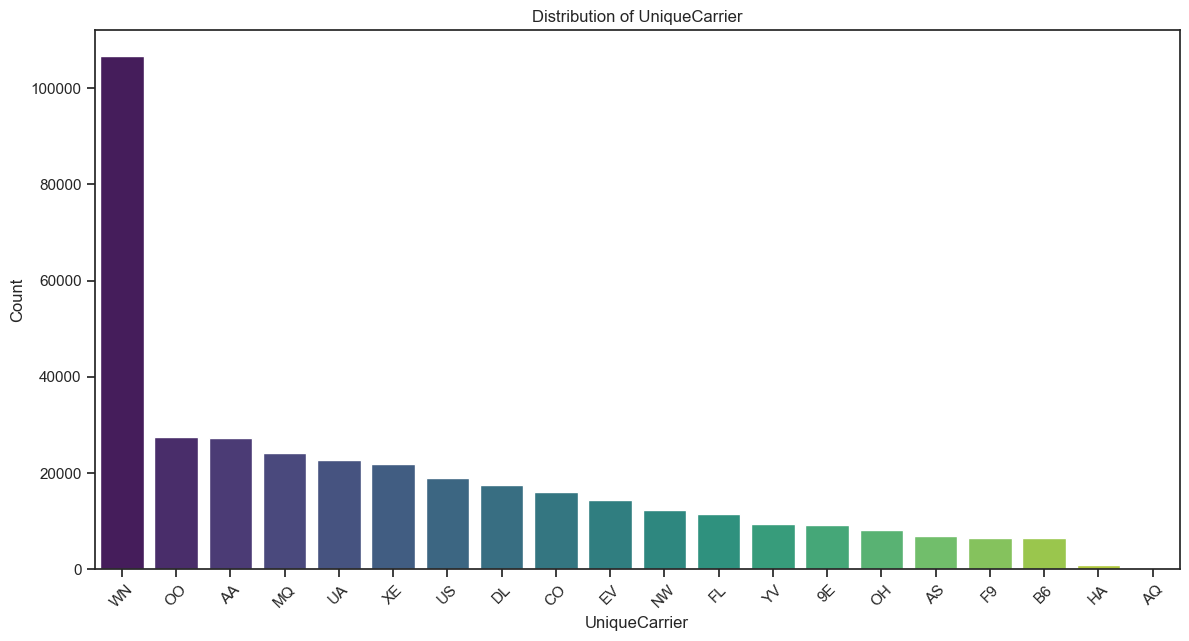

In [30]:
sns.set(style="ticks")  # Set a plot style
plt.figure(figsize=(14, 7))  # Set the figure size
sns.barplot(x=carrier_counts.index, y=carrier_counts.values, palette="viridis")  # Create the bar plot
plt.title("Distribution of UniqueCarrier")
plt.xlabel("UniqueCarrier")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

C:\Users\Talha\AppData\Local\Temp\ipykernel_3852\1807551154.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=CancellationCode_counts.index, y=CancellationCode_counts.values, palette="viridis")  # Create the bar plot


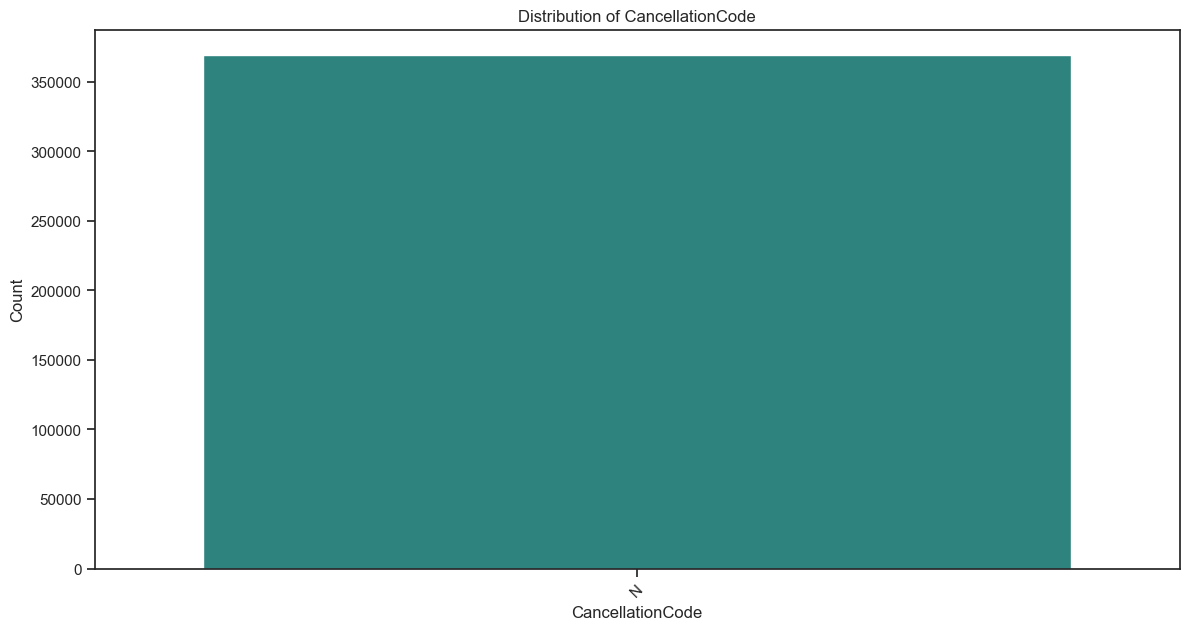

In [31]:
sns.set(style="ticks")  # Set a plot style
plt.figure(figsize=(14, 7))  # Set the figure size
sns.barplot(x=CancellationCode_counts.index, y=CancellationCode_counts.values, palette="viridis")  # Create the bar plot
plt.title("Distribution of CancellationCode")
plt.xlabel("CancellationCode")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

C:\Users\Talha\AppData\Local\Temp\ipykernel_3852\1807957420.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=TailNum_counts.index, y=TailNum_counts.values, palette="viridis")  # Create the bar plot


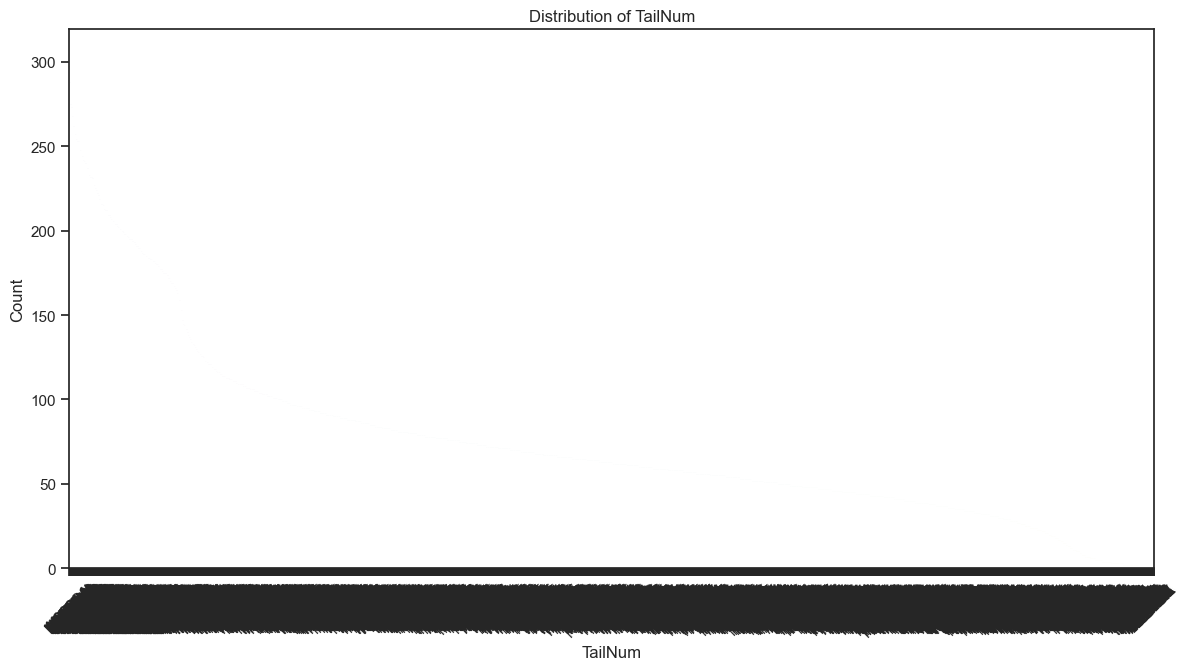

In [32]:
sns.set(style="ticks")  # Set a plot style
plt.figure(figsize=(14, 7))  # Set the figure size
sns.barplot(x=TailNum_counts.index, y=TailNum_counts.values, palette="viridis")  # Create the bar plot
plt.title("Distribution of TailNum")
plt.xlabel("TailNum")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

C:\Users\Talha\AppData\Local\Temp\ipykernel_3852\3675758911.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Origin_counts.index, y=Origin_counts.values, palette="viridis")  # Create the bar plot


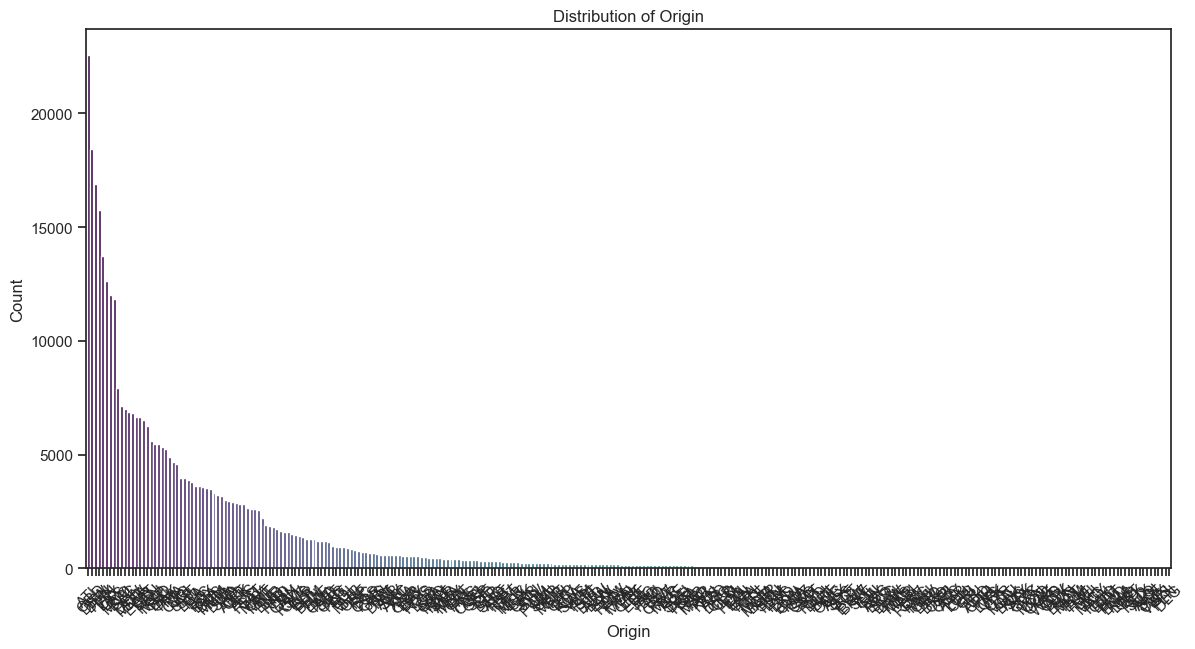

In [33]:
sns.set(style="ticks")  # Set a plot style
plt.figure(figsize=(14, 7))  # Set the figure size
sns.barplot(x=Origin_counts.index, y=Origin_counts.values, palette="viridis")  # Create the bar plot
plt.title("Distribution of Origin")
plt.xlabel("Origin")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


C:\Users\Talha\AppData\Local\Temp\ipykernel_3852\2818999011.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Dest_counts.index, y=Dest_counts.values, palette="viridis")  # Create the bar plot


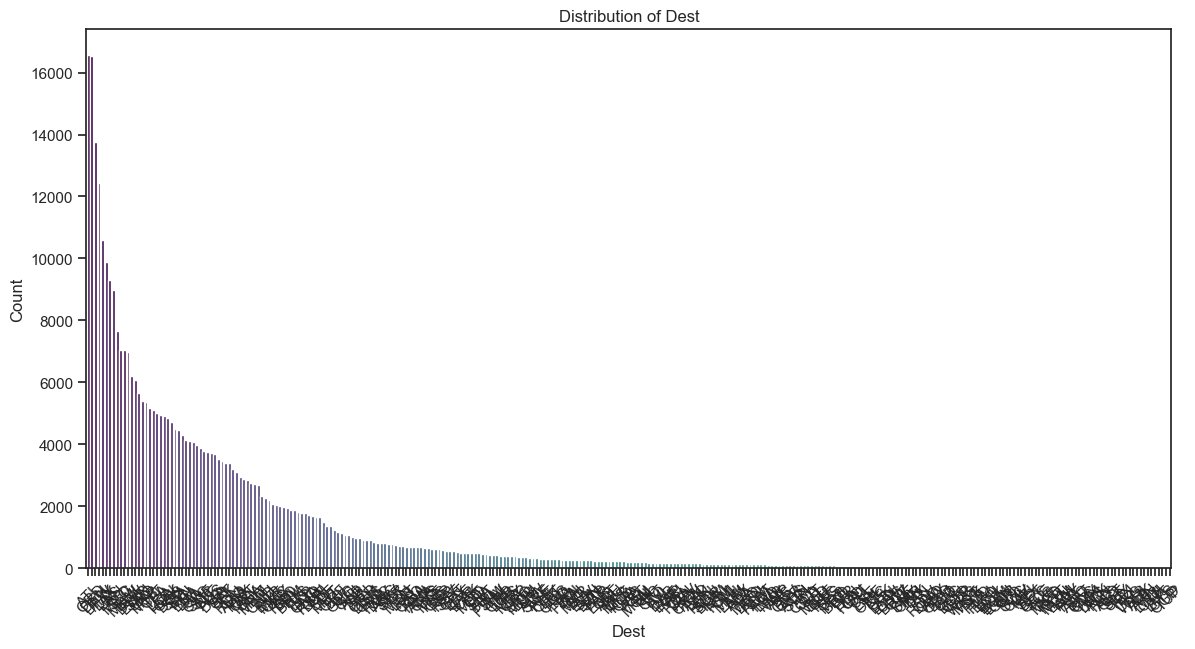

In [34]:
sns.set(style="ticks")  # Set a plot style
plt.figure(figsize=(14, 7))  # Set the figure size
sns.barplot(x=Dest_counts.index, y=Dest_counts.values, palette="viridis")  # Create the bar plot
plt.title("Distribution of Dest")
plt.xlabel("Dest")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [35]:
numeric_cols = data.select_dtypes(include=[int, float]).columns

# Hist Plot

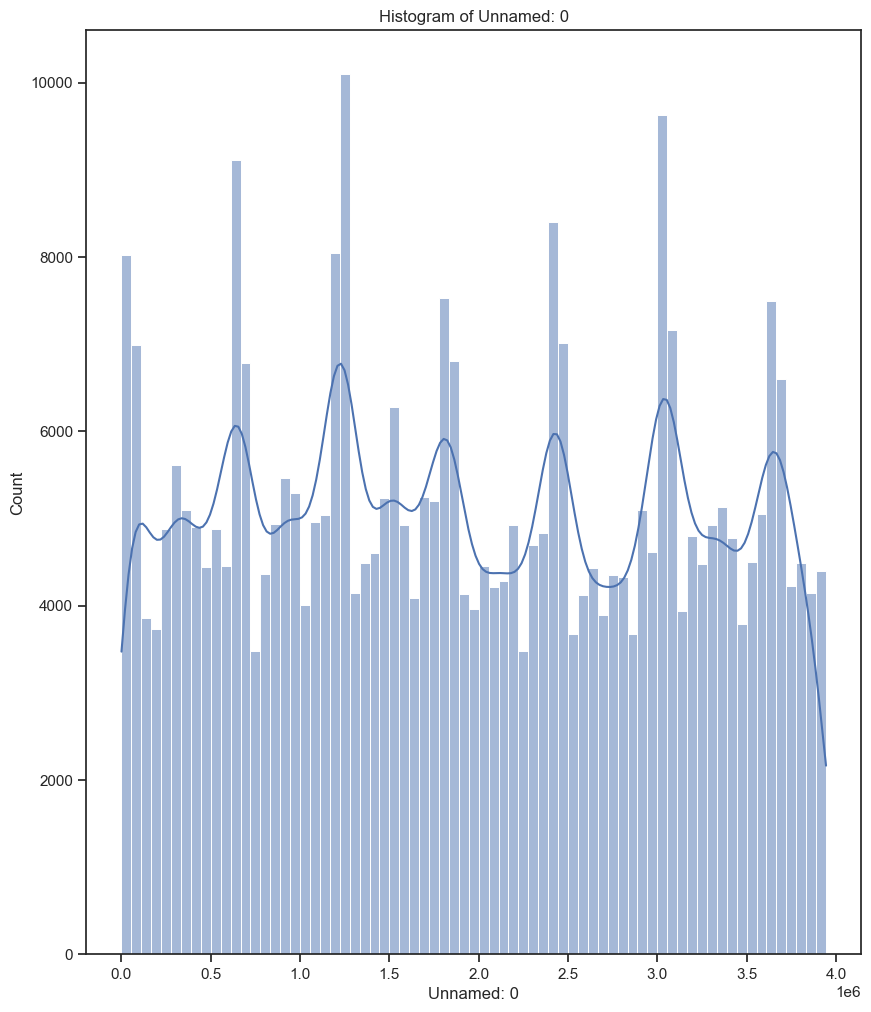

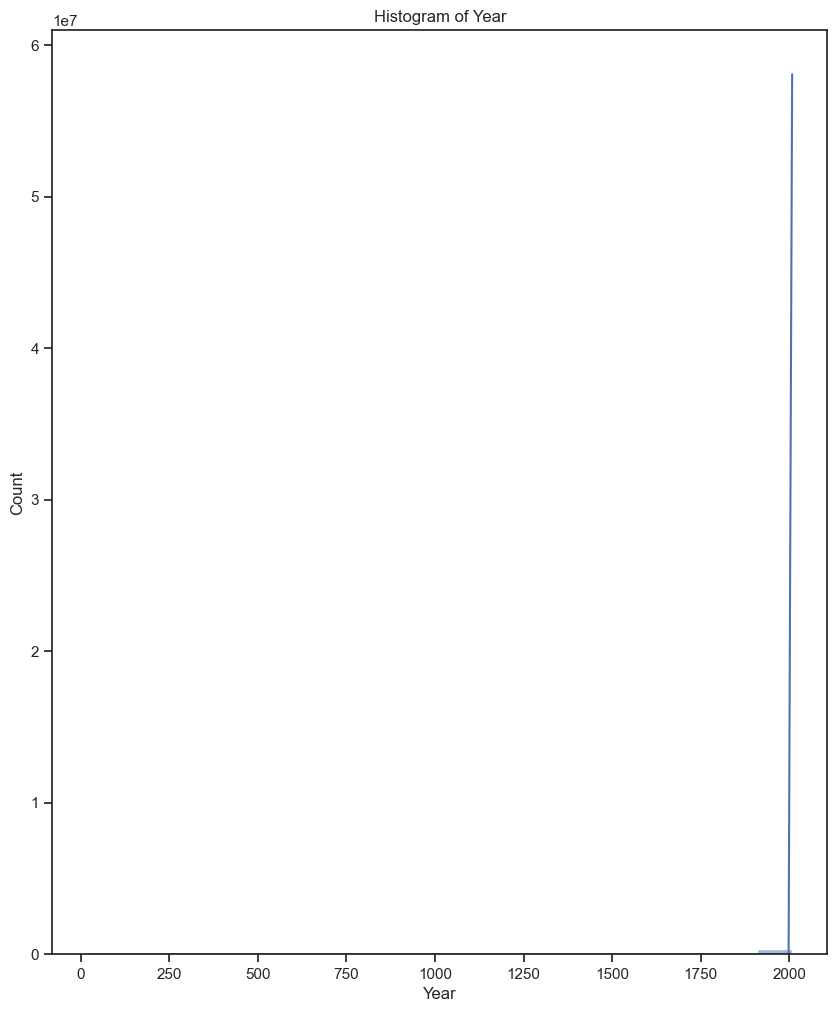

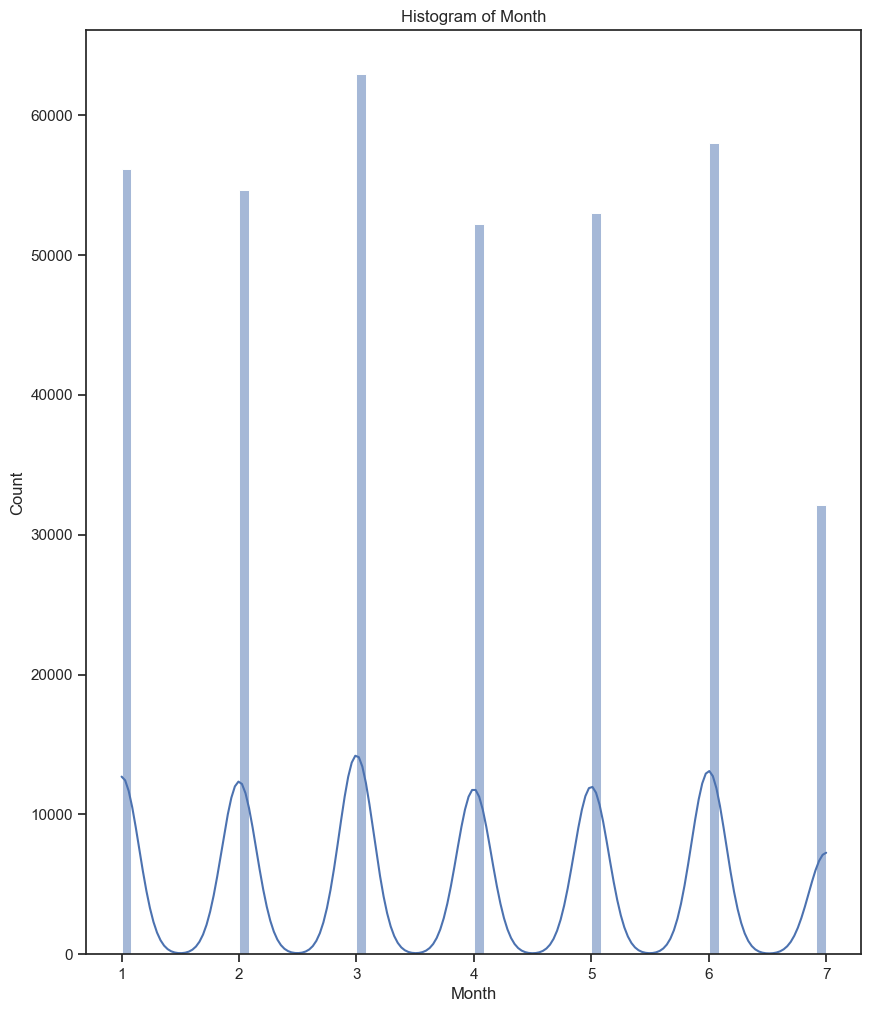

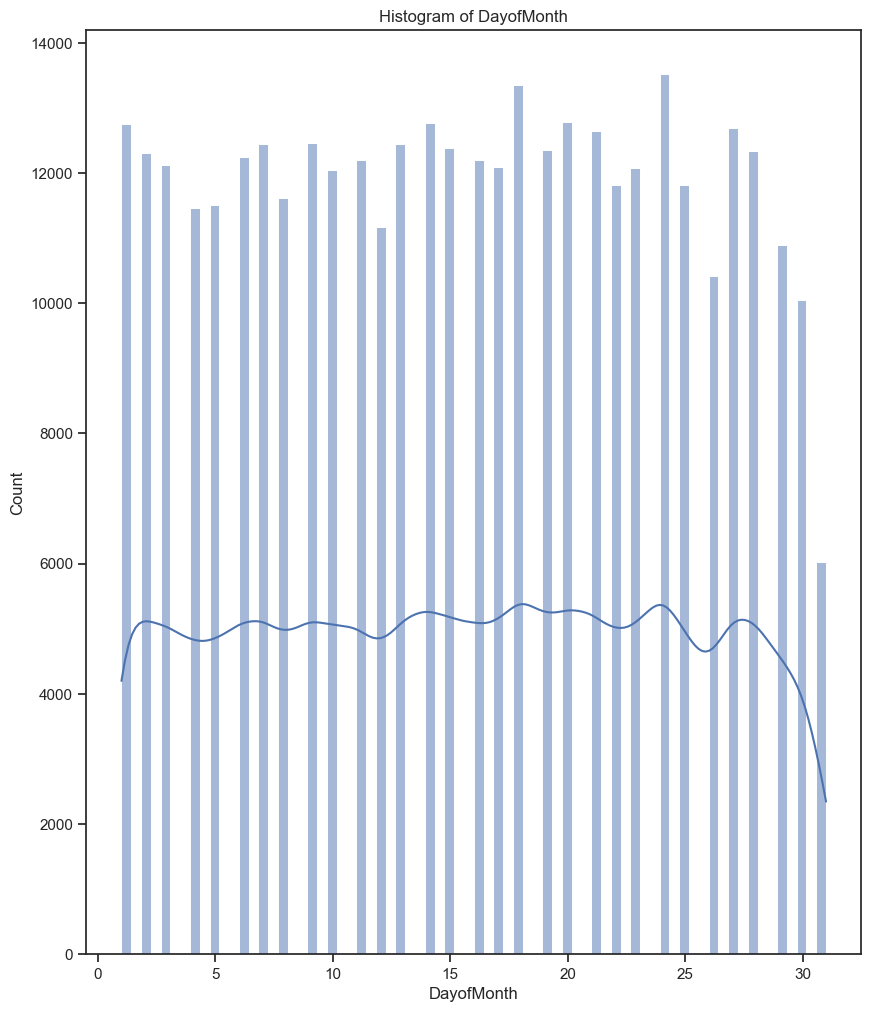

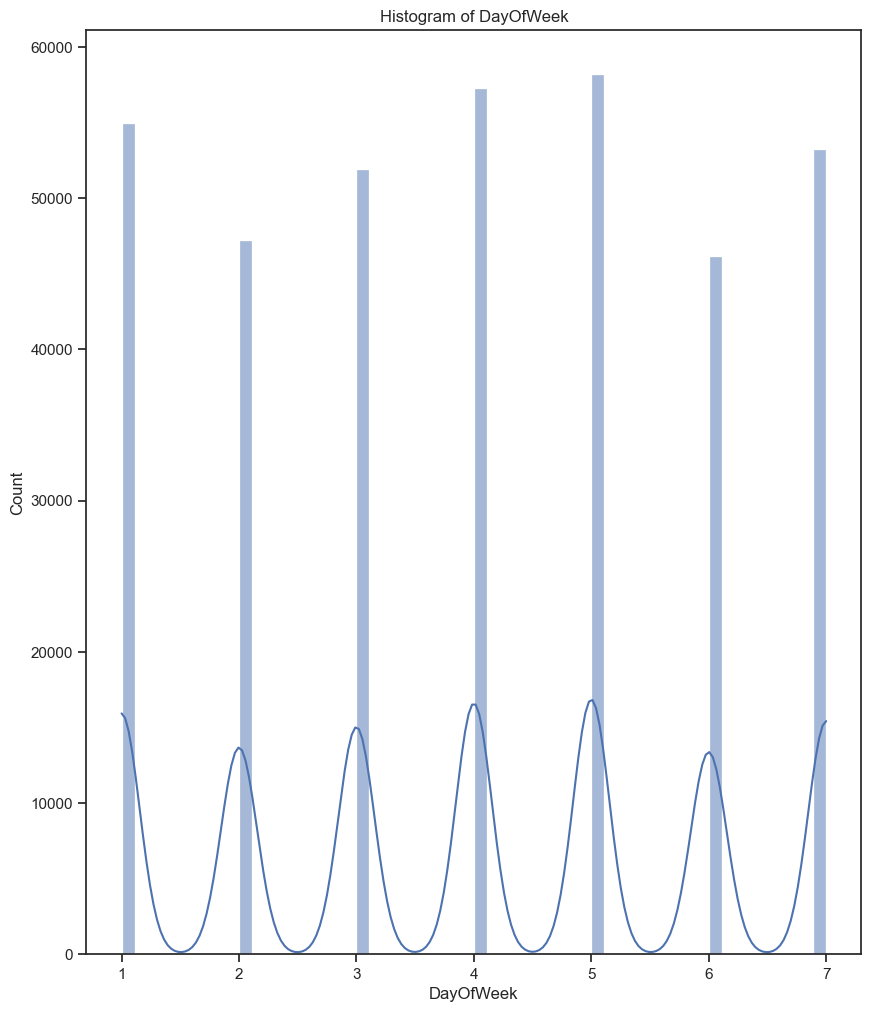

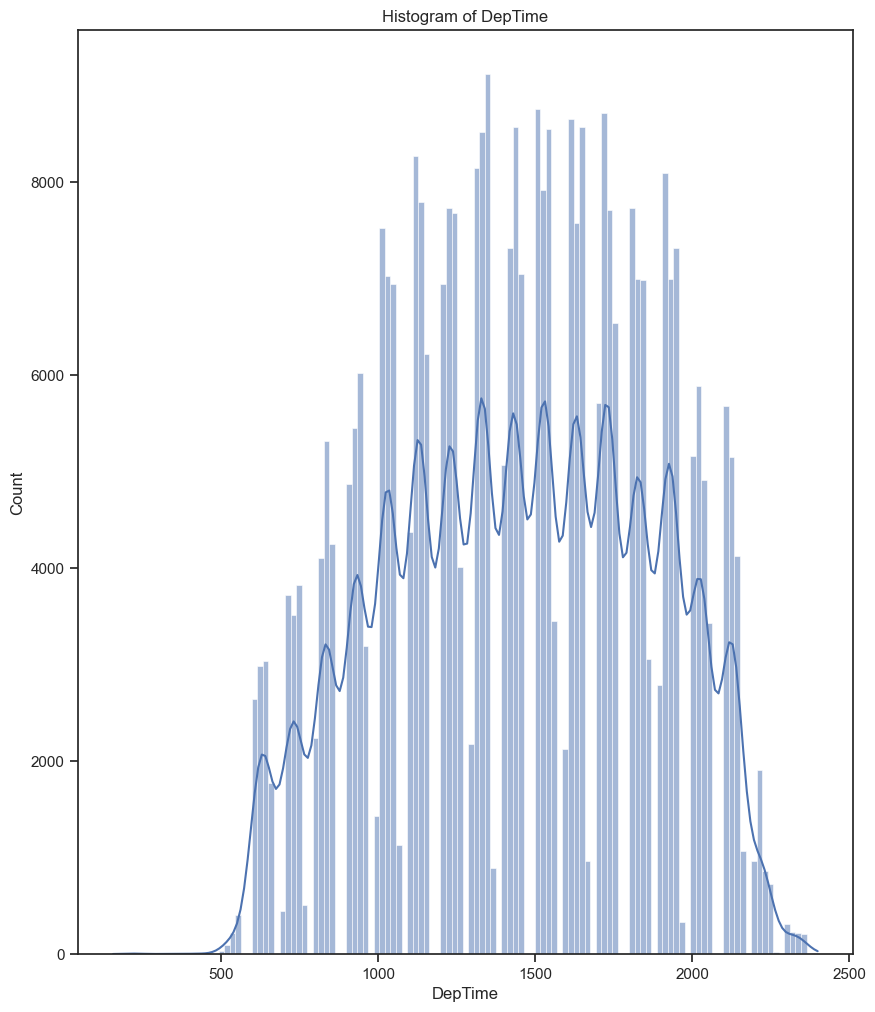

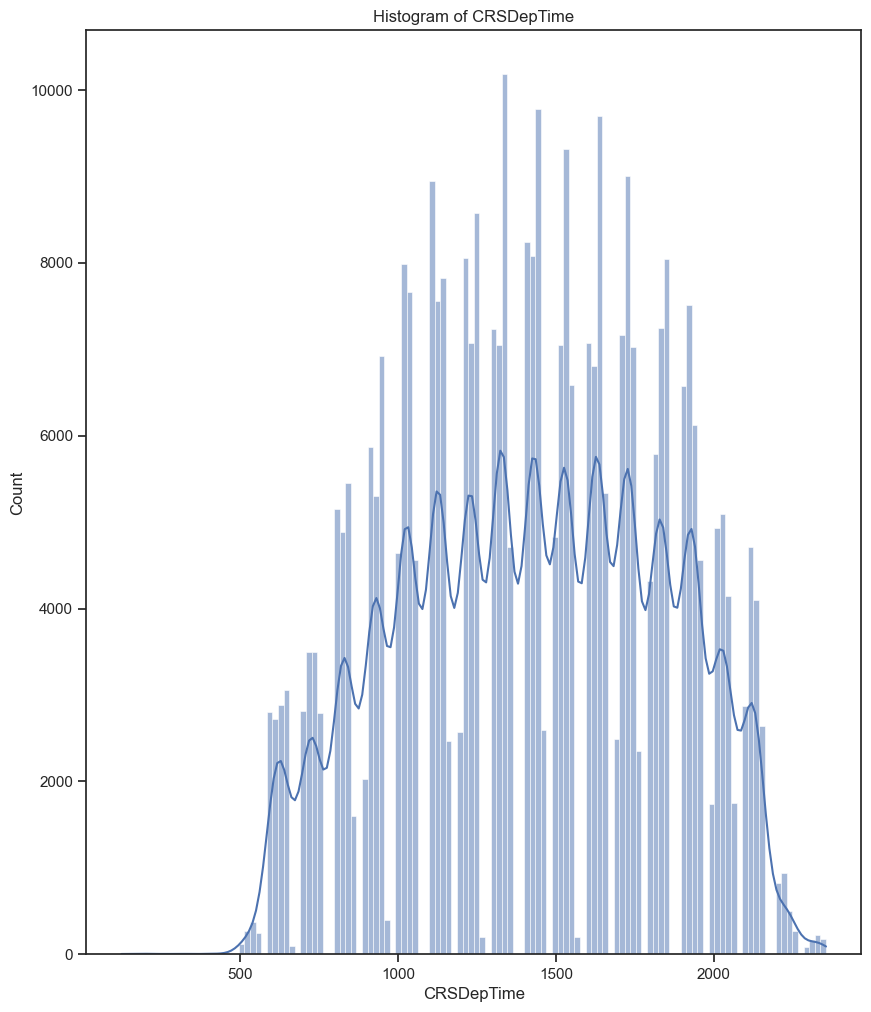

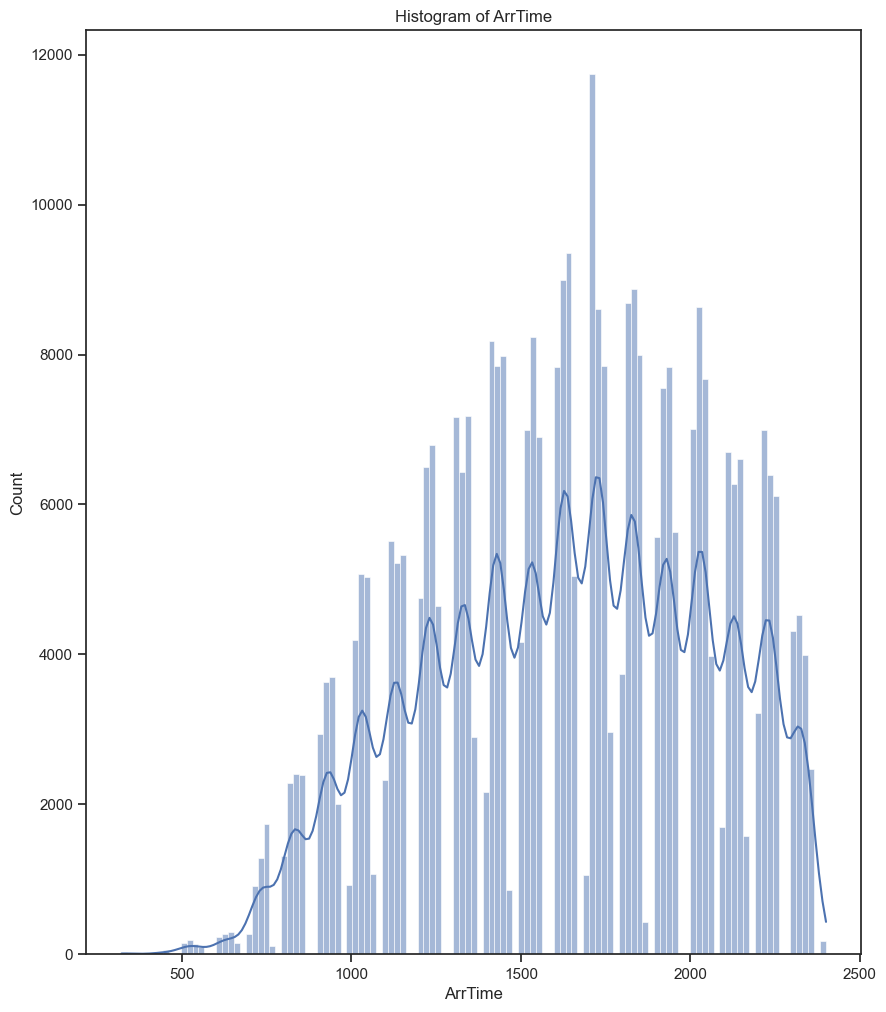

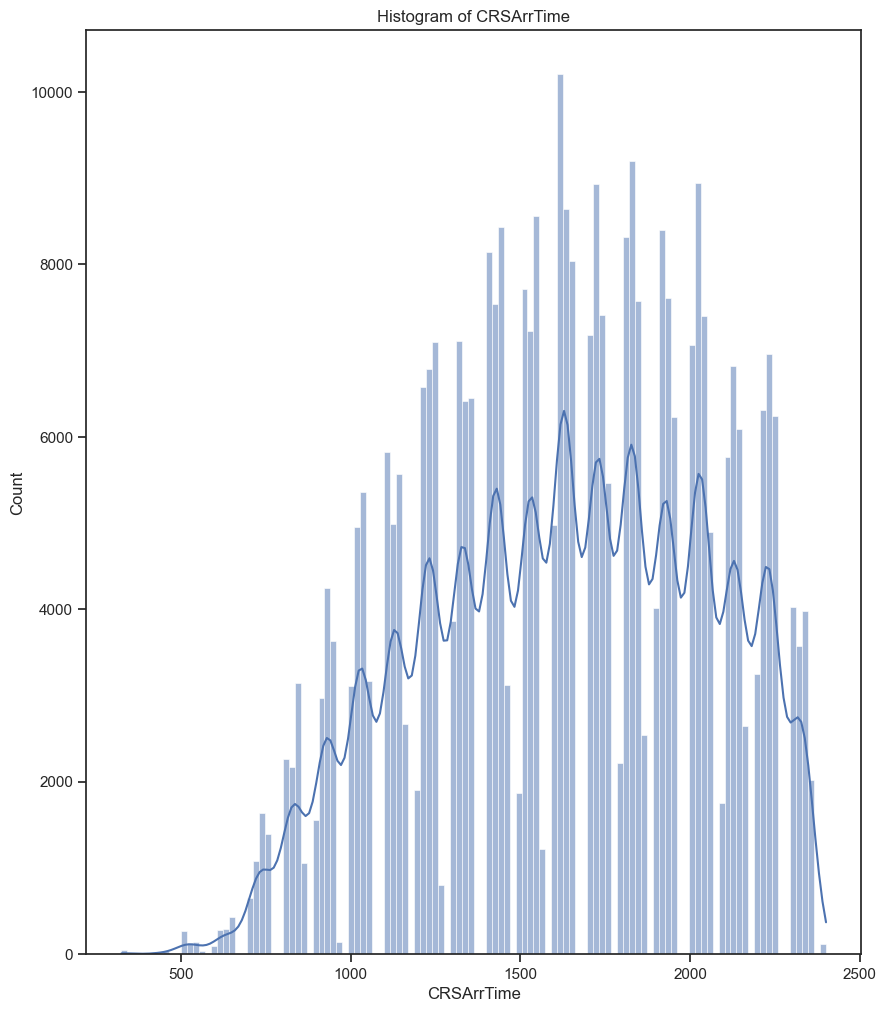

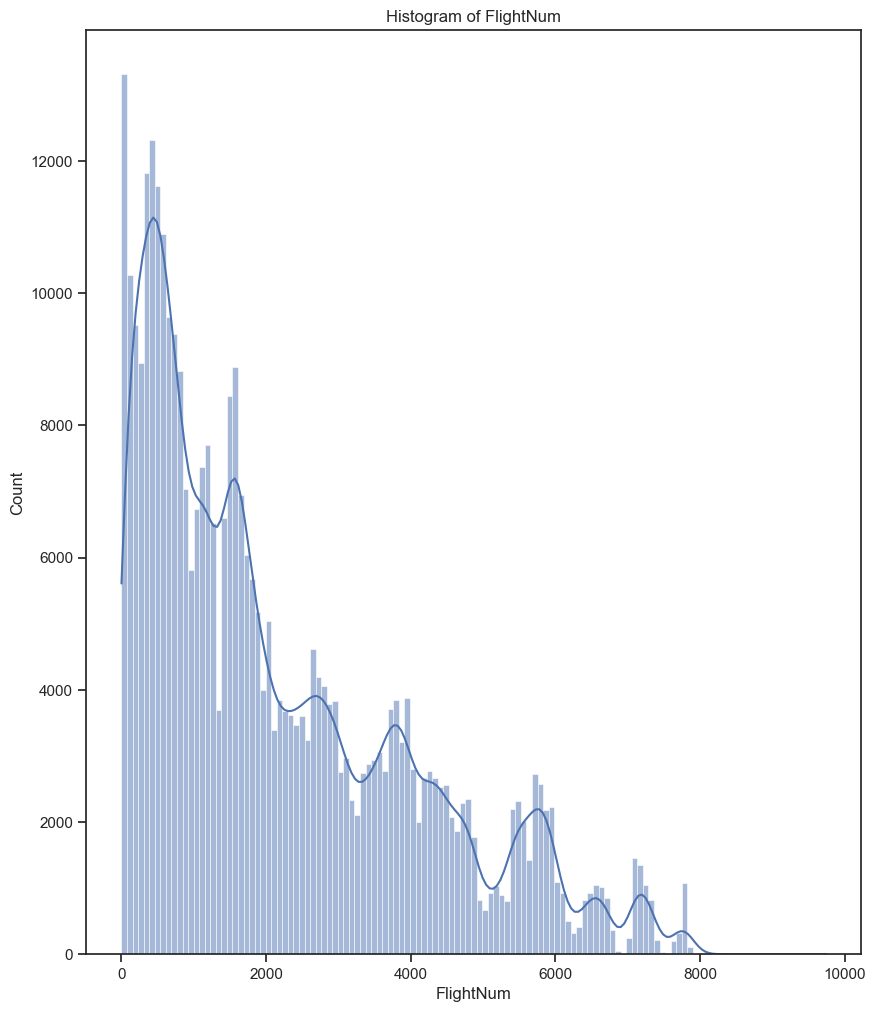

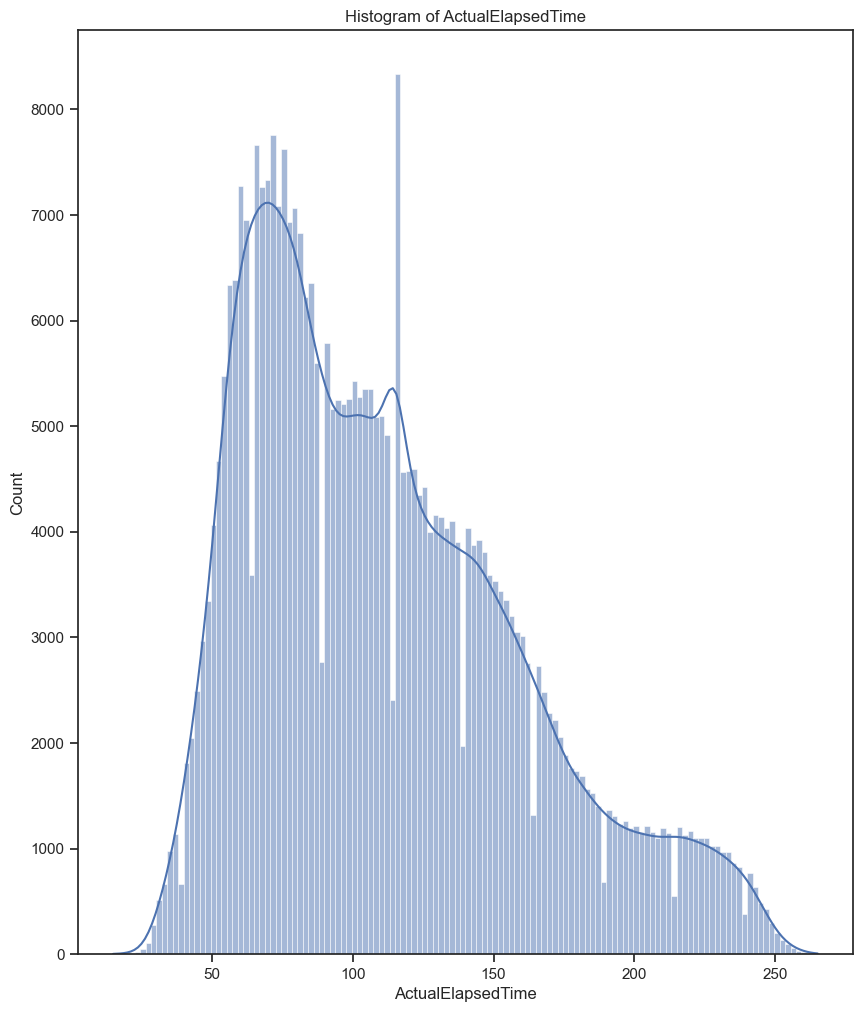

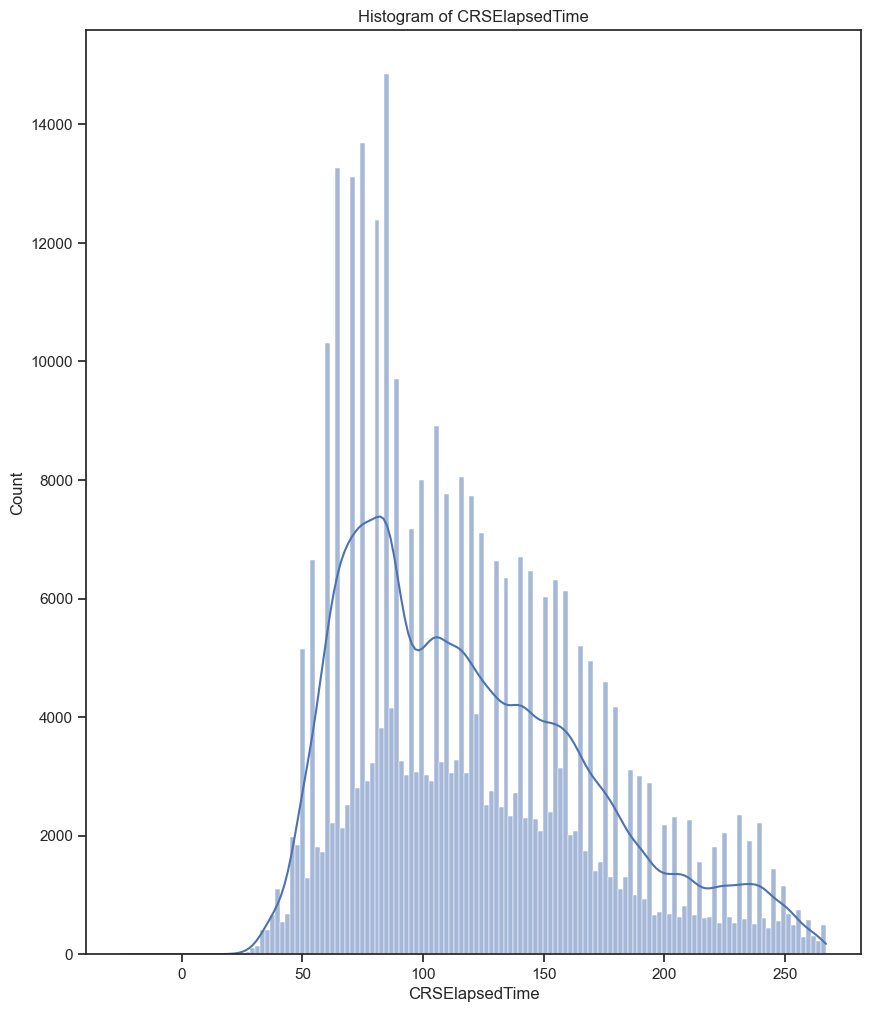

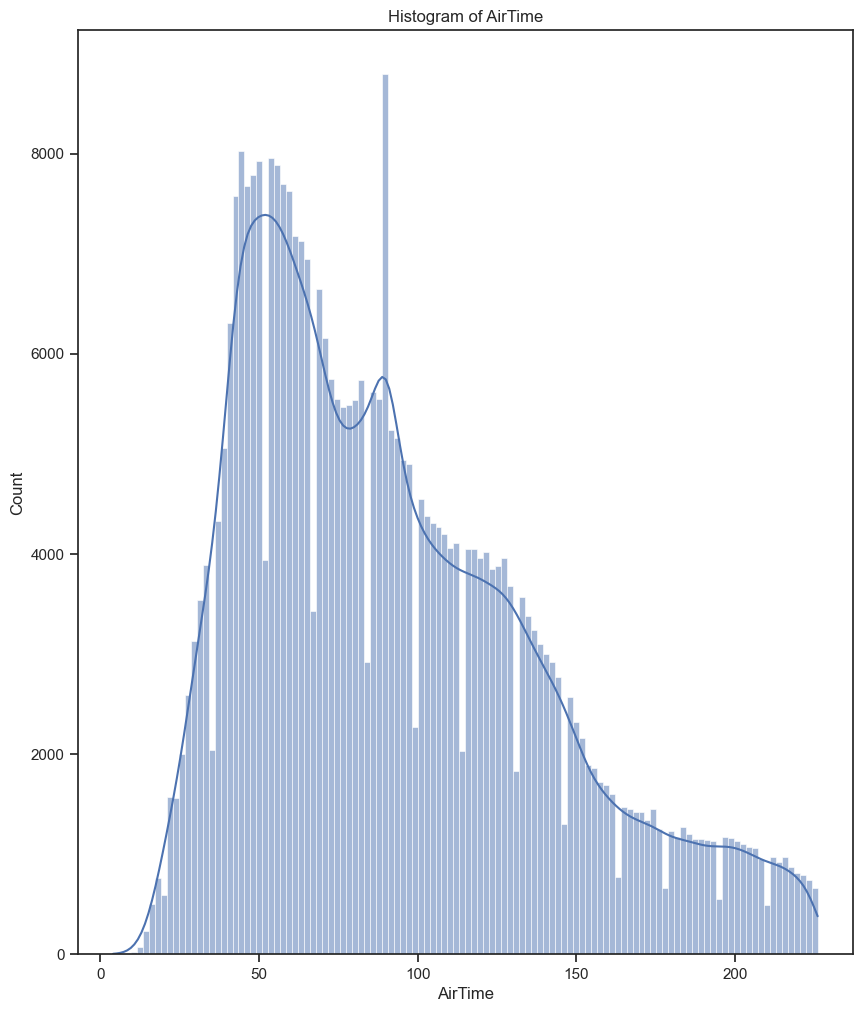

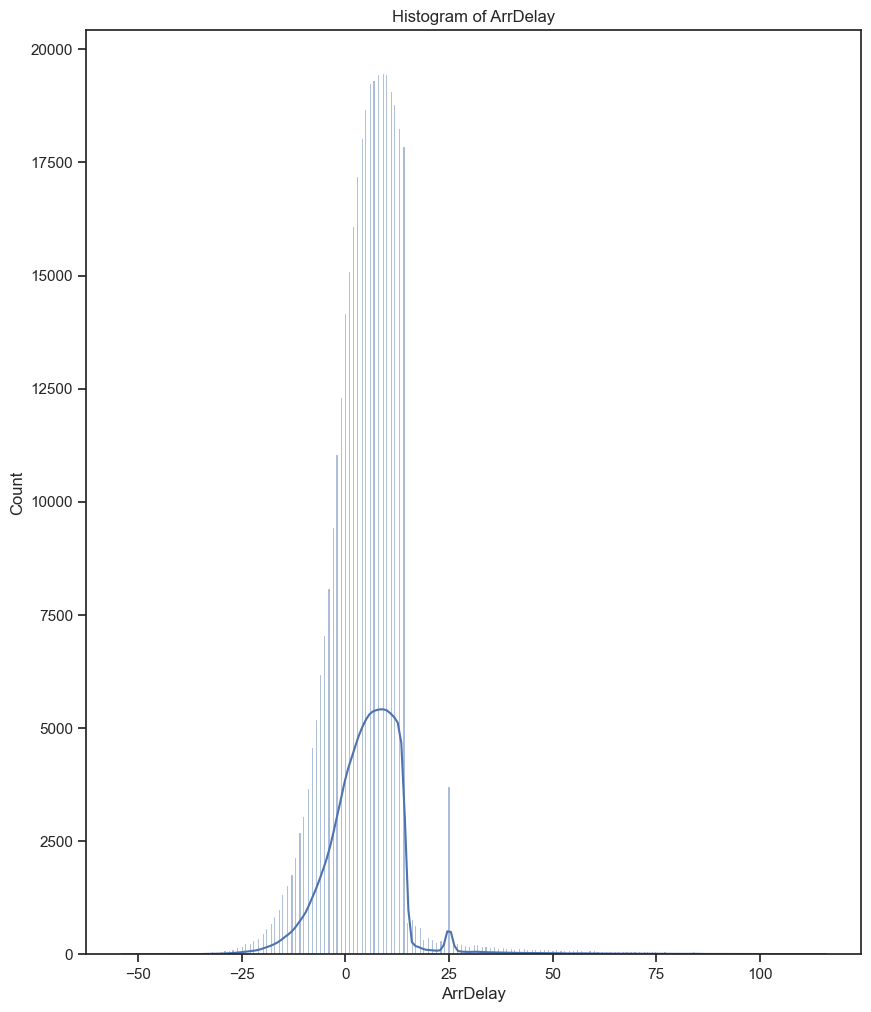

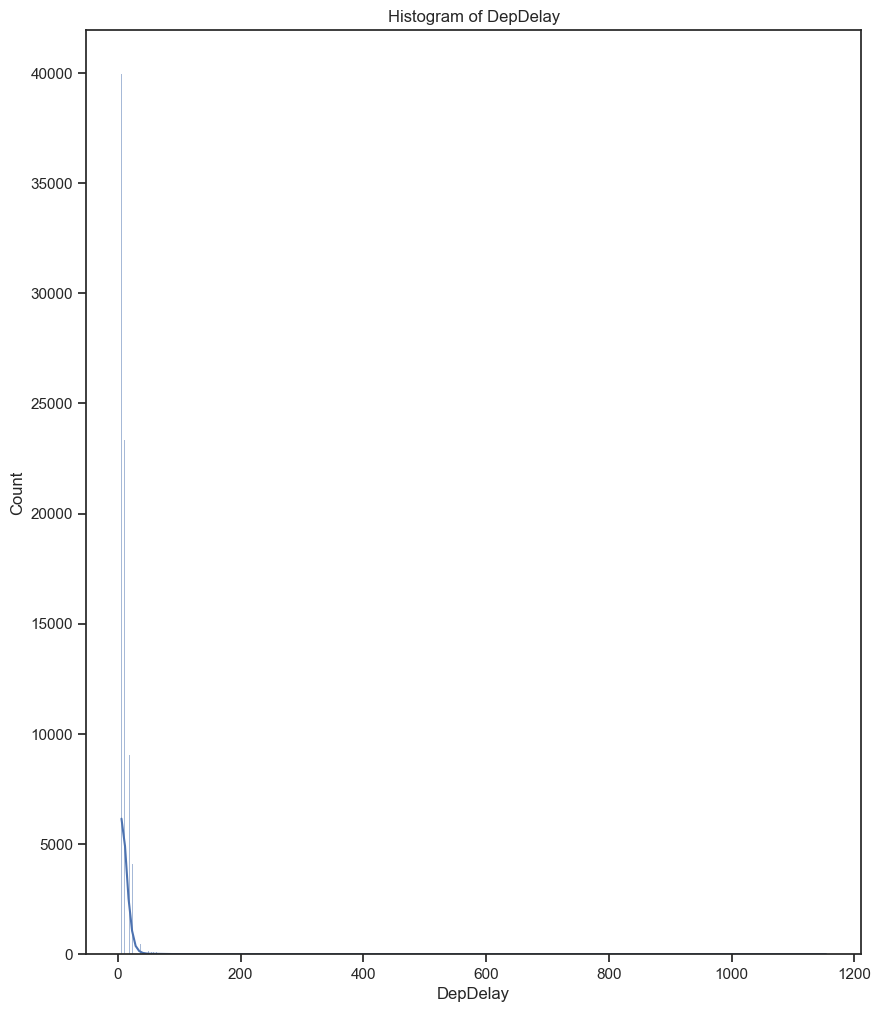

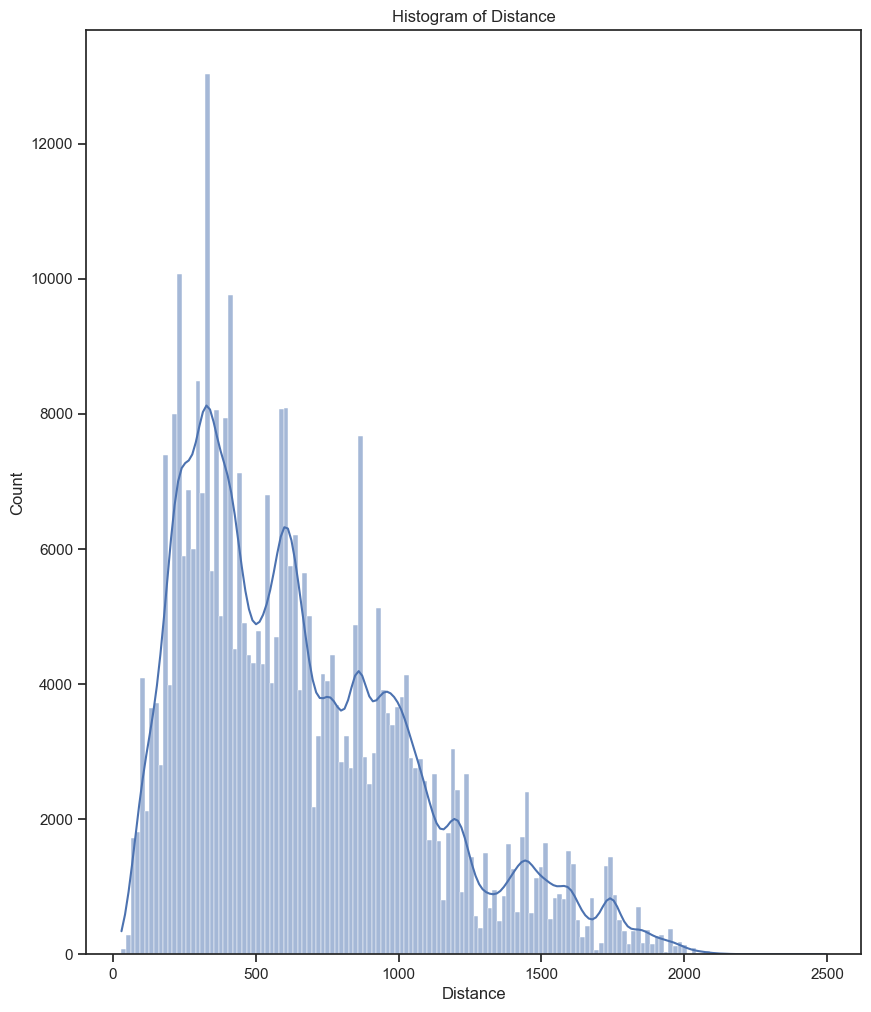

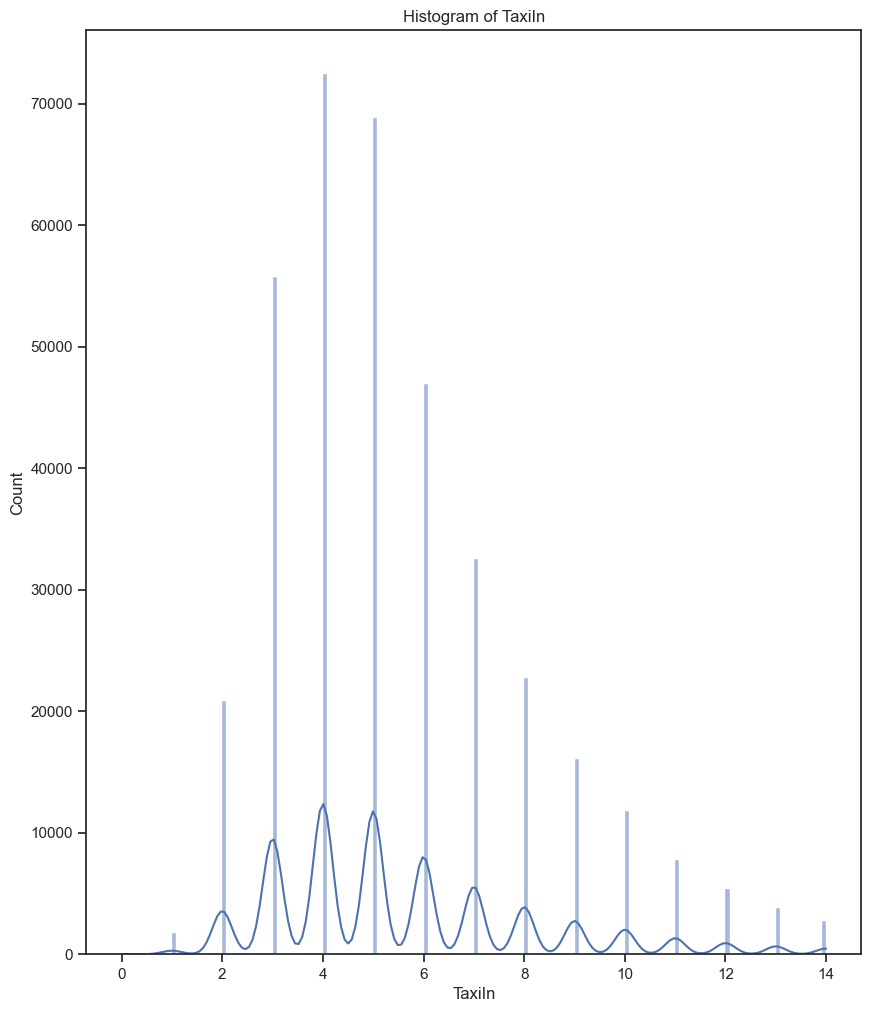

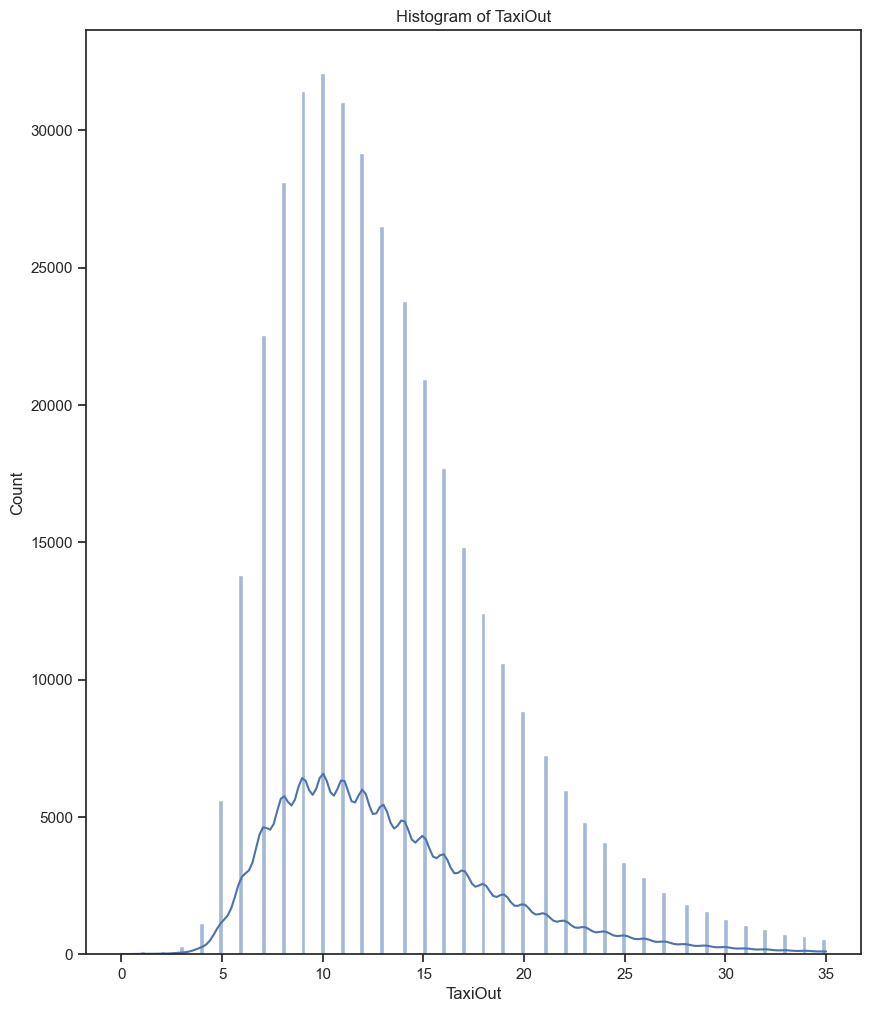

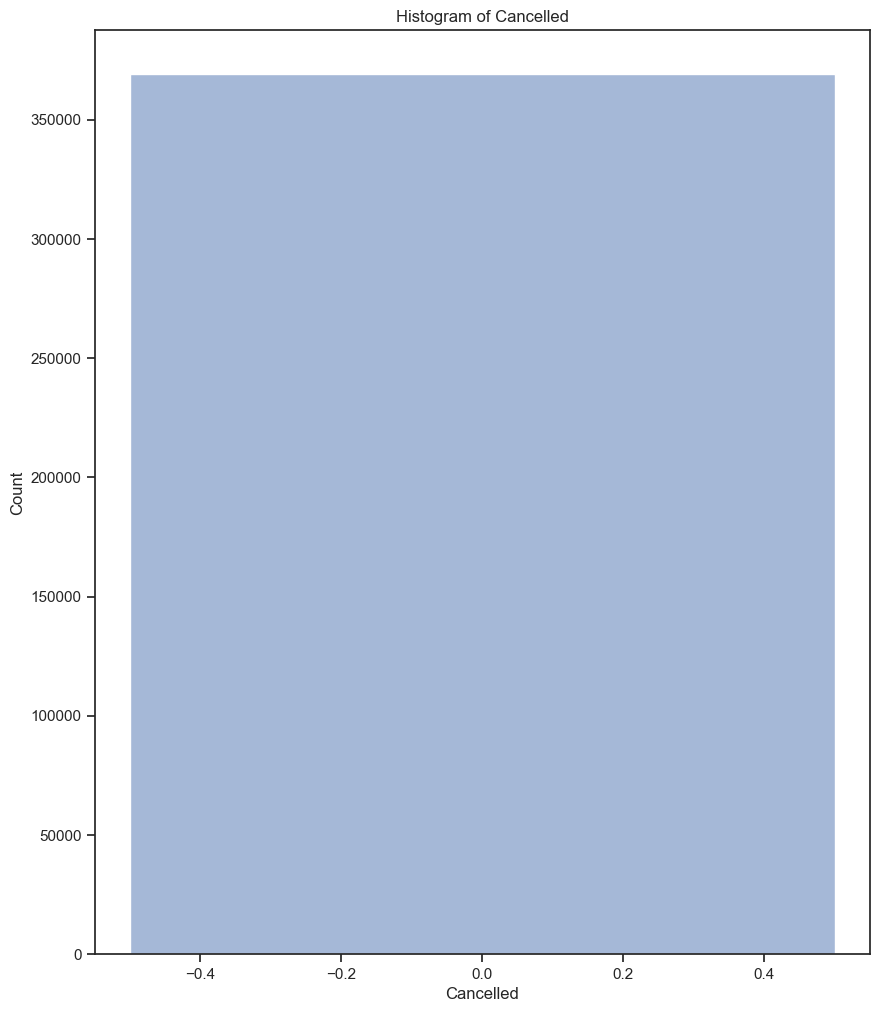

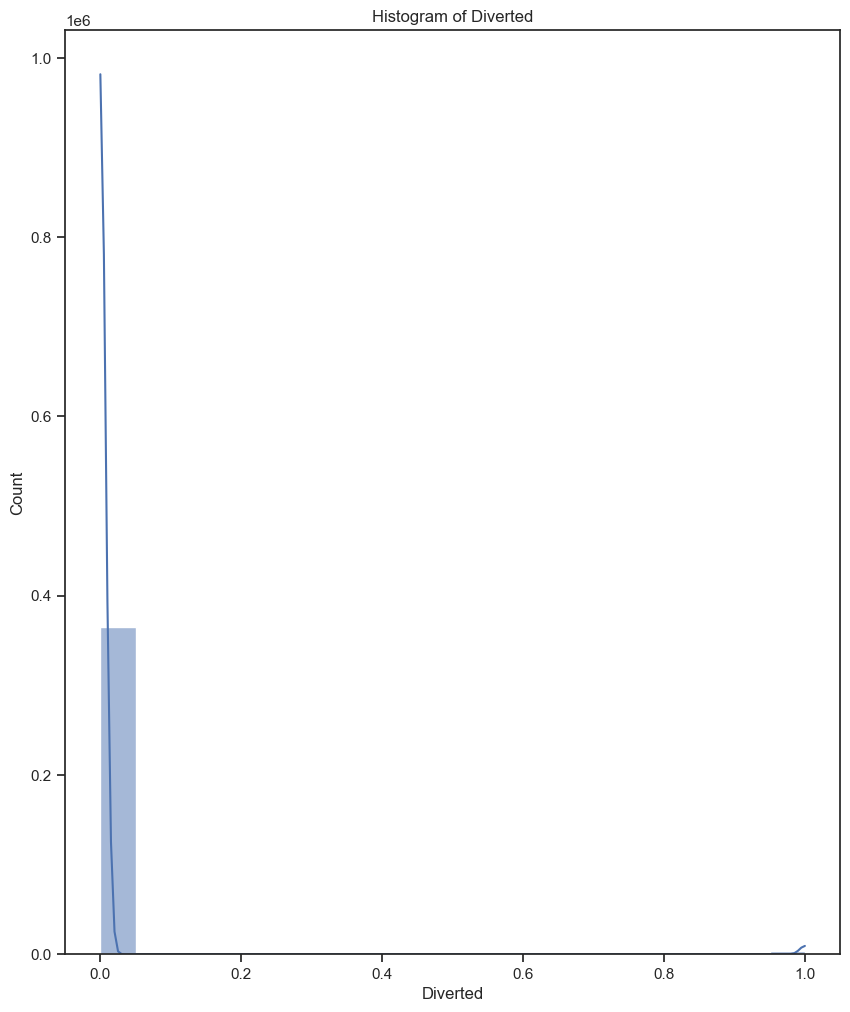

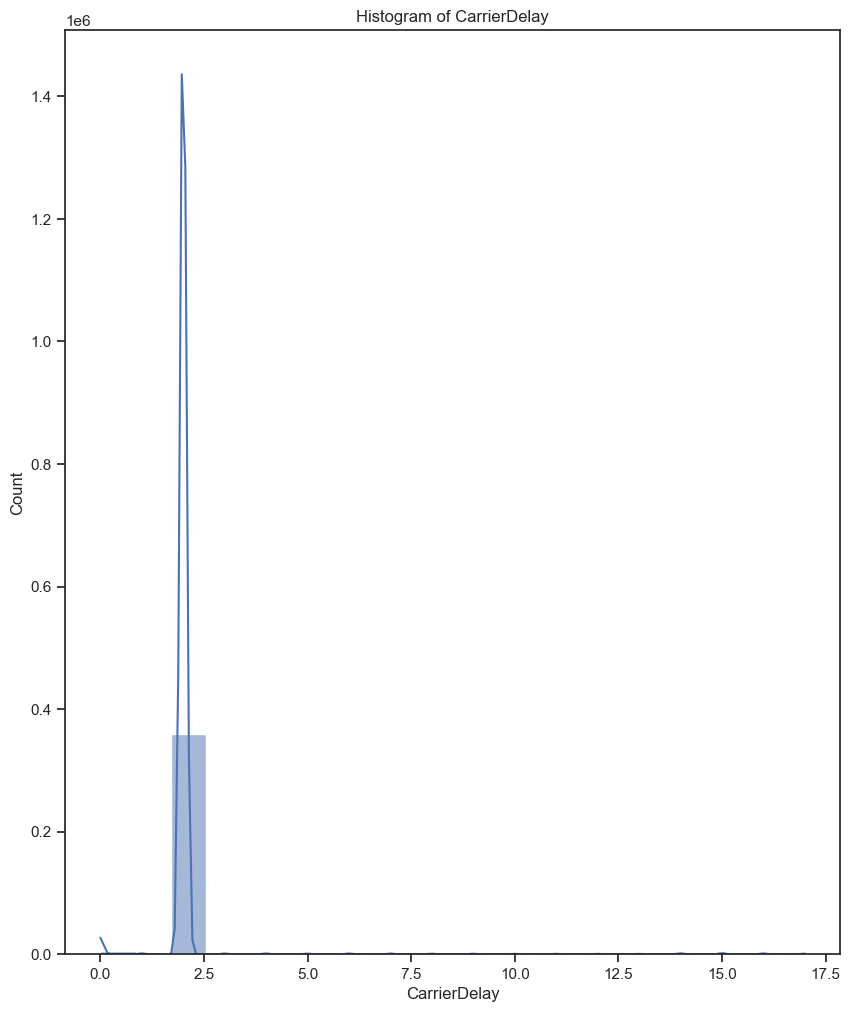

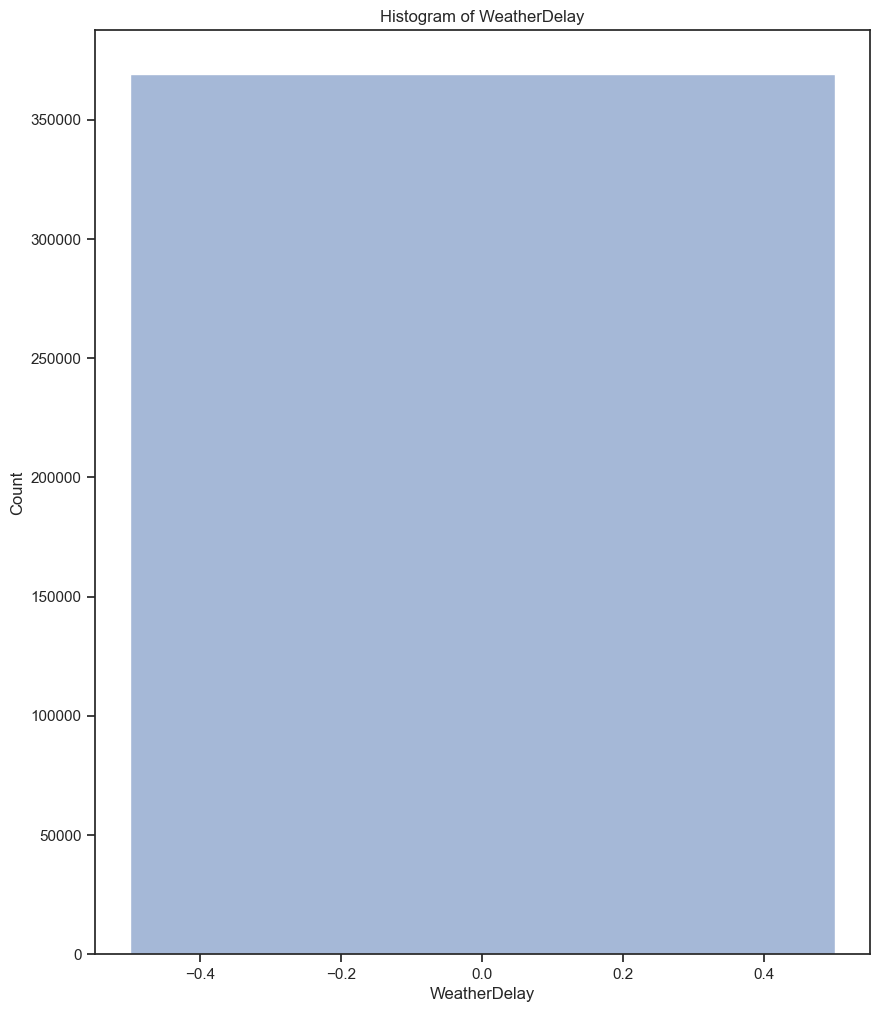

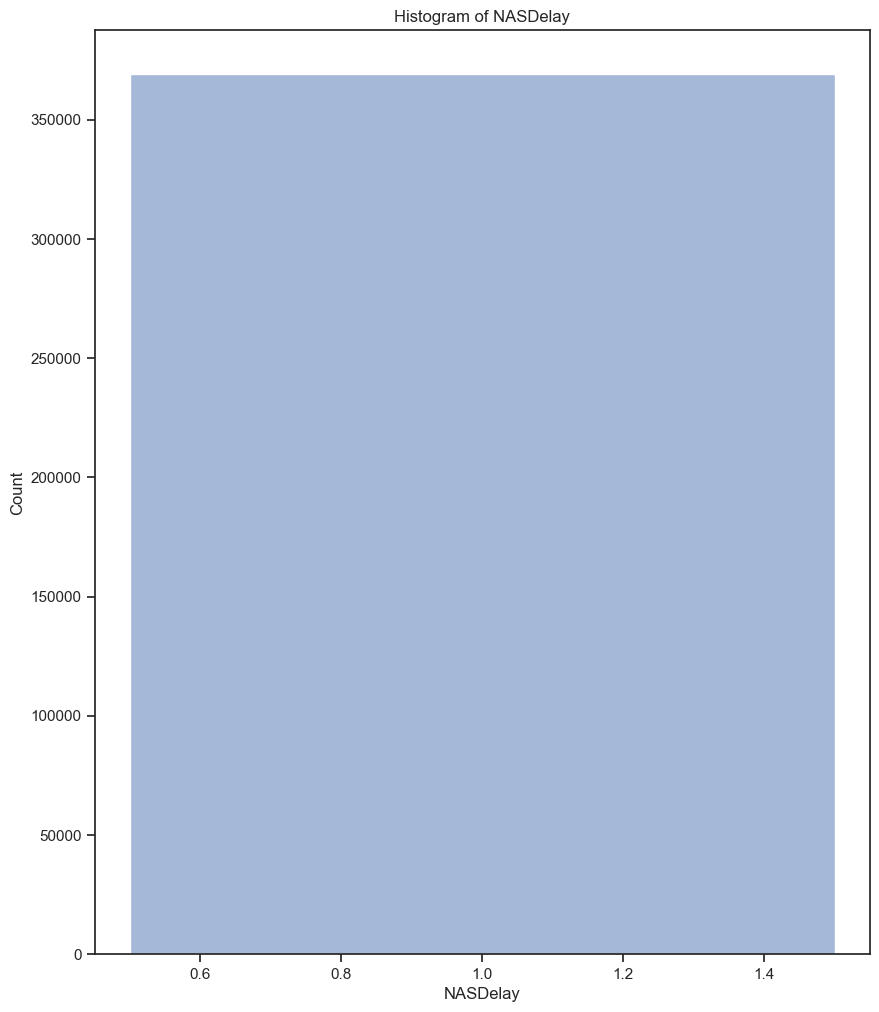

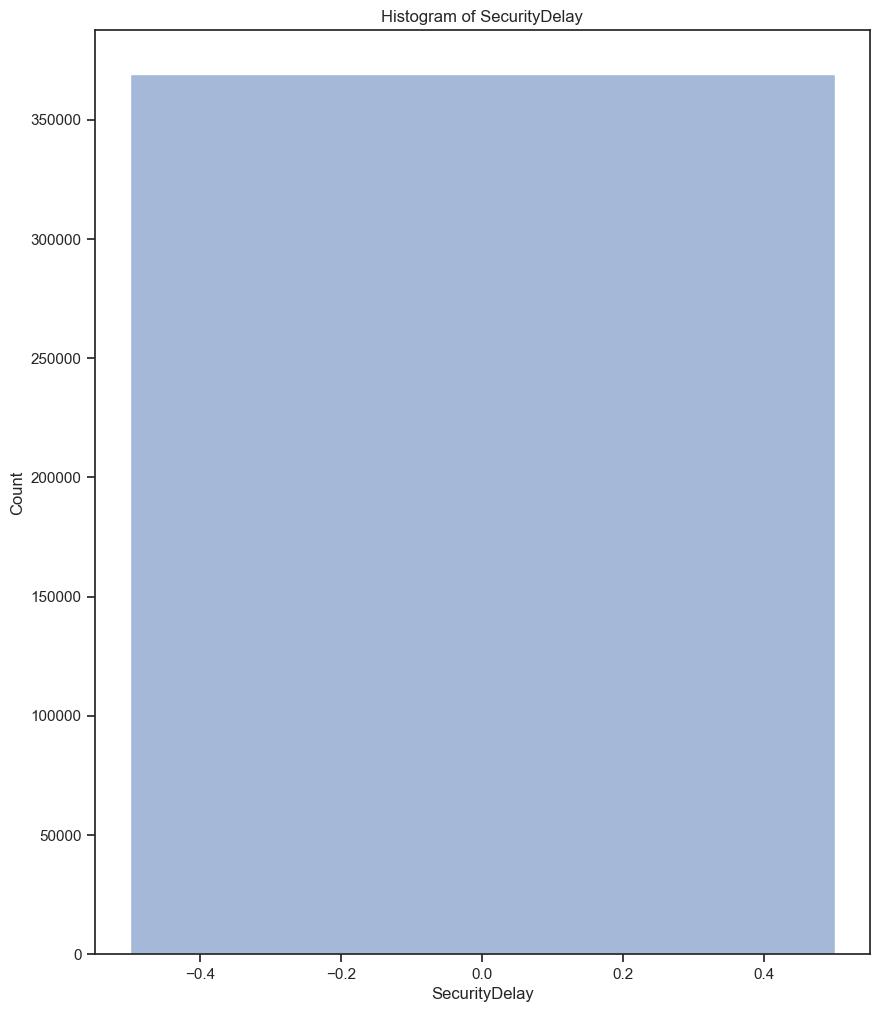

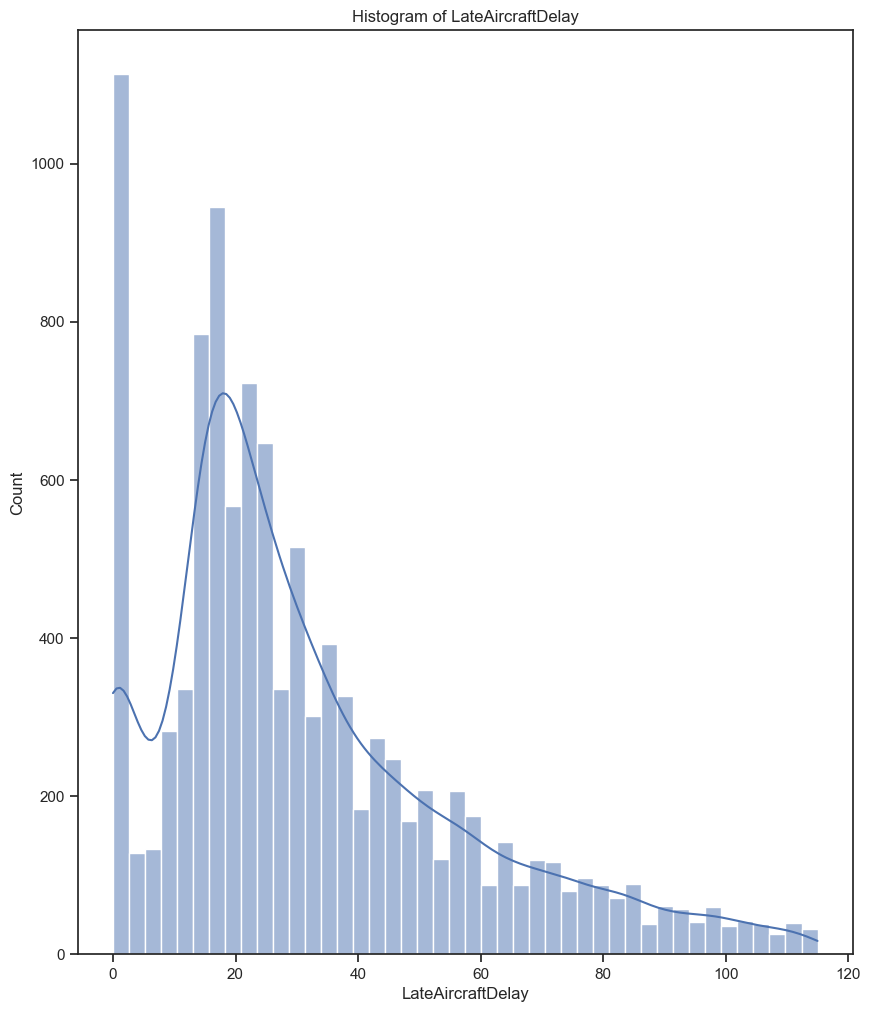

In [36]:
#histograms
for col in numeric_cols:
    plt.figure(figsize=(10, 12))
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

# Time Analysis

In [37]:
flights_by_year = data.groupby('Year').size()

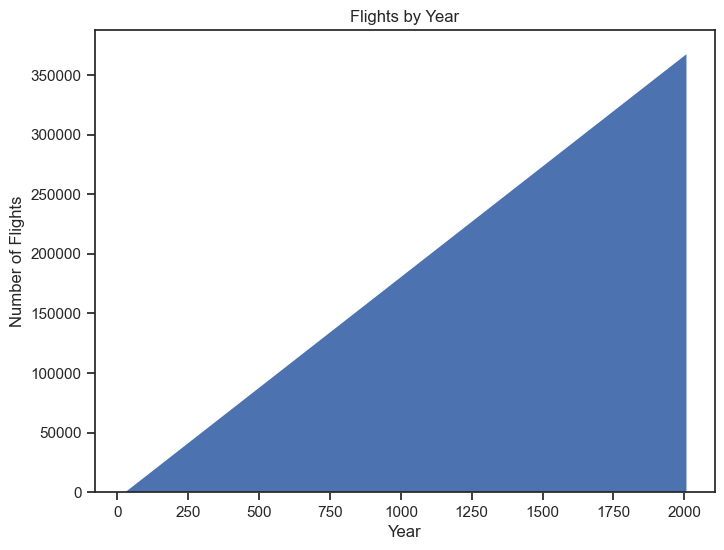

In [38]:
plt.figure(figsize=(8, 6))
plt.stackplot(flights_by_year.index, flights_by_year.values)
plt.title('Flights by Year')
plt.xlabel('Year')
plt.ylabel('Number of Flights')
plt.show()

In [39]:
flights_by_month = data.groupby('Month').size()

C:\Users\Talha\AppData\Local\Temp\ipykernel_3852\1452451170.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=flights_by_month.index, y=flights_by_month.values, palette="viridis")


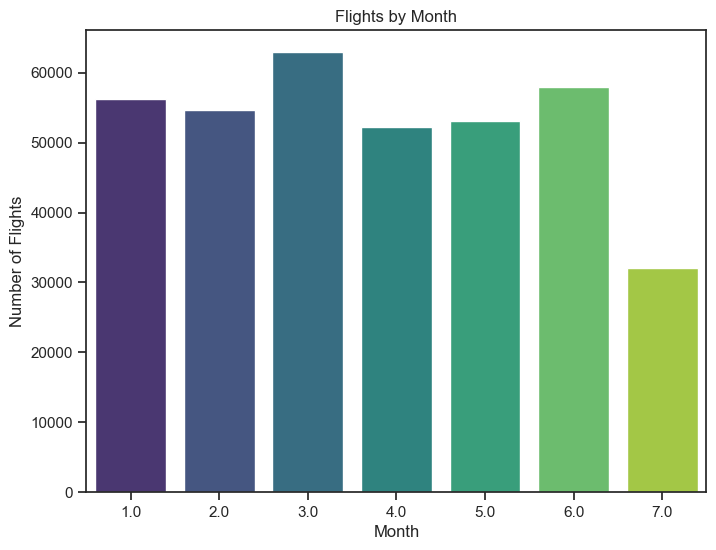

In [40]:
sns.set(style="ticks")
plt.figure(figsize=(8, 6))
sns.barplot(x=flights_by_month.index, y=flights_by_month.values, palette="viridis")
plt.title('Flights by Month')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.show()

In [41]:
flights_by_day_of_month = data.groupby('DayofMonth').size()

C:\Users\Talha\AppData\Local\Temp\ipykernel_3852\303257253.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=flights_by_day_of_month.index, y=flights_by_day_of_month.values, palette="viridis")


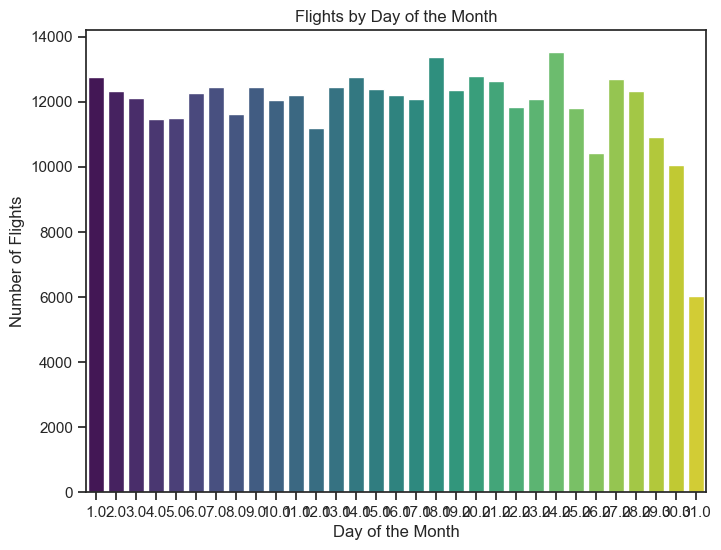

In [42]:
sns.set(style="ticks")
plt.figure(figsize=(8, 6))
sns.barplot(x=flights_by_day_of_month.index, y=flights_by_day_of_month.values, palette="viridis")
plt.title('Flights by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Flights')
plt.show()

In [43]:
flights_by_day_of_week = data.groupby('DayOfWeek').size()

C:\Users\Talha\AppData\Local\Temp\ipykernel_3852\4152266.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=flights_by_day_of_week.index, y=flights_by_day_of_week.values, palette="viridis")


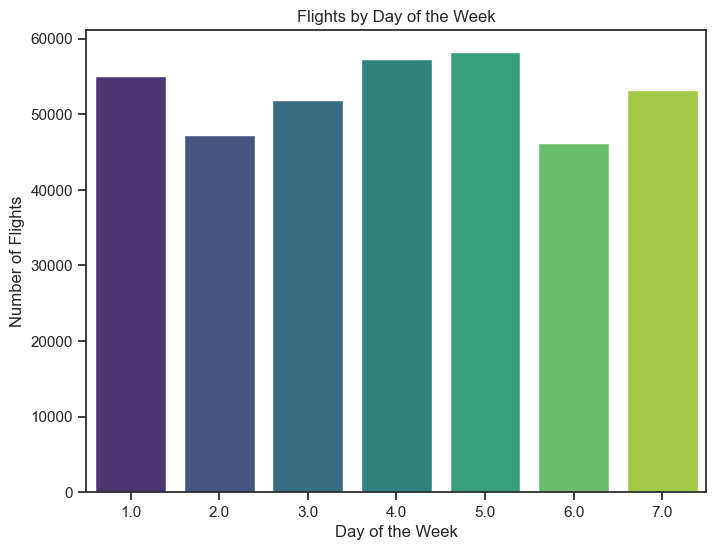

In [44]:
sns.set(style="ticks")
plt.figure(figsize=(8, 6))
sns.barplot(x=flights_by_day_of_week.index, y=flights_by_day_of_week.values, palette="viridis")
plt.title('Flights by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Flights')
plt.show()

# Flight Delays

C:\Users\Talha\anaconda3\envs\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


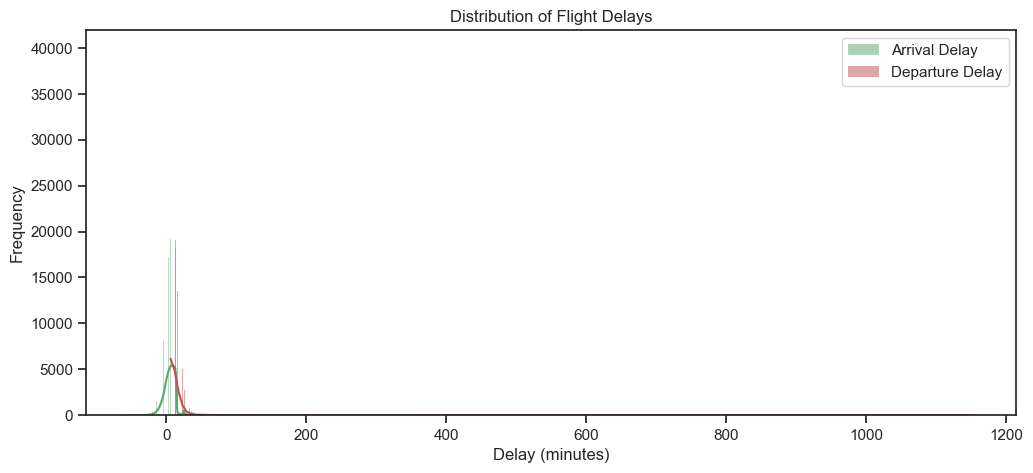

In [45]:
plt.figure(figsize=(12, 5))
sns.histplot(data['ArrDelay'], kde=True, color='g', label='Arrival Delay')
sns.histplot(data['DepDelay'], kde=True, color='r', label='Departure Delay')
plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Flight Delays')
plt.legend()

# Analyze the impact of delay reasons
delay_reasons = data[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]
delay_reasons_total = delay_reasons.sum()


# Carrier Analysis

C:\Users\Talha\AppData\Local\Temp\ipykernel_3852\582320561.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=on_time_arrival.index, y=on_time_arrival.values, palette="Blues_d", label="Arrival On-Time Rate")
C:\Users\Talha\AppData\Local\Temp\ipykernel_3852\582320561.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=on_time_departure.index, y=on_time_departure.values, palette="Reds_d", label="Departure On-Time Rate")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '9E'),
  Text(1, 0, 'AA'),
  Text(2, 0, 'AQ'),
  Text(3, 0, 'AS'),
  Text(4, 0, 'B6'),
  Text(5, 0, 'CO'),
  Text(6, 0, 'DL'),
  Text(7, 0, 'EV'),
  Text(8, 0, 'F9'),
  Text(9, 0, 'FL'),
  Text(10, 0, 'HA'),
  Text(11, 0, 'MQ'),
  Text(12, 0, 'NW'),
  Text(13, 0, 'OH'),
  Text(14, 0, 'OO'),
  Text(15, 0, 'UA'),
  Text(16, 0, 'US'),
  Text(17, 0, 'WN'),
  Text(18, 0, 'XE'),
  Text(19, 0, 'YV')])

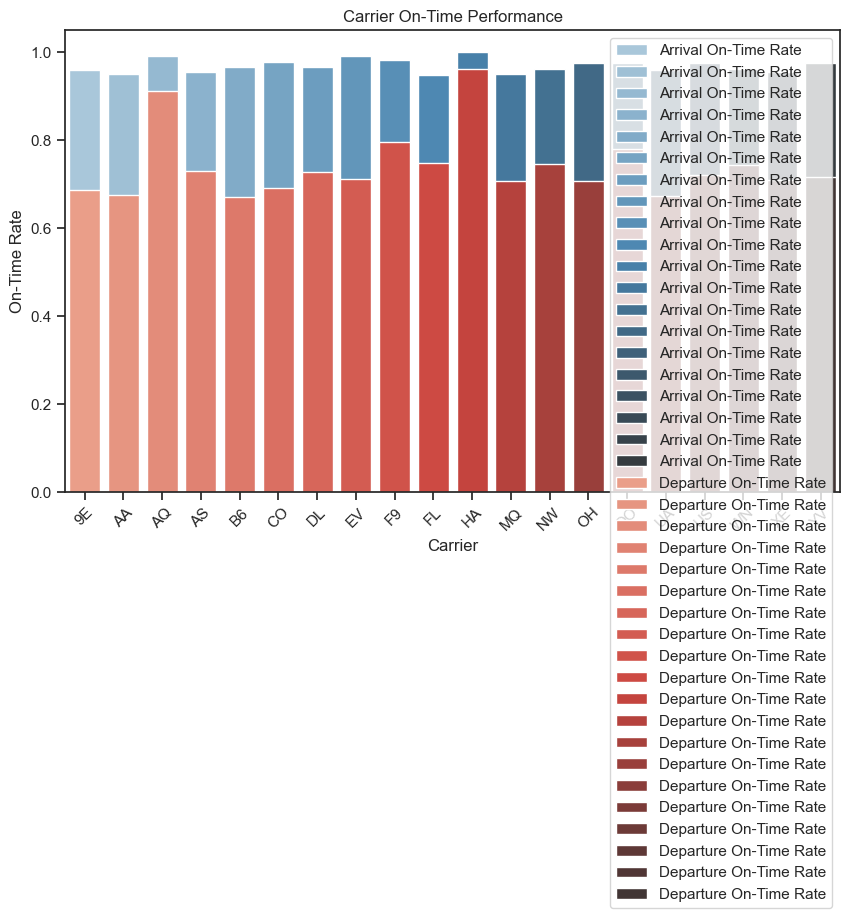

In [46]:
# Calculate on-time performance metrics for carriers
on_time_threshold = 15  # Define a threshold for on-time performance (e.g., 15 minutes)
on_time_arrival = (data['ArrDelay'] <= on_time_threshold).groupby(data['UniqueCarrier']).mean()
on_time_departure = (data['DepDelay'] <= on_time_threshold).groupby(data['UniqueCarrier']).mean()

# Create bar charts to compare carriers
plt.figure(figsize=(10, 6))
sns.barplot(x=on_time_arrival.index, y=on_time_arrival.values, palette="Blues_d", label="Arrival On-Time Rate")
sns.barplot(x=on_time_departure.index, y=on_time_departure.values, palette="Reds_d", label="Departure On-Time Rate")
plt.xlabel('Carrier')
plt.ylabel('On-Time Rate')
plt.title('Carrier On-Time Performance')
plt.legend()
plt.xticks(rotation=45)


# Raute Analysis

In [47]:
common_routes = data.groupby(['Origin', 'Dest']).size().sort_values(ascending=False).head(5)
print(f"Common routes are: {common_routes}")

Common routes are: Origin  Dest
LAX     SFO     965
HOU     DAL     885
LAS     LAX     857
DAL     HOU     823
PHX     LAX     785
dtype: int64


C:\Users\Talha\AppData\Local\Temp\ipykernel_3852\3913896352.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='route', y='count', data=top_routes, palette="viridis")


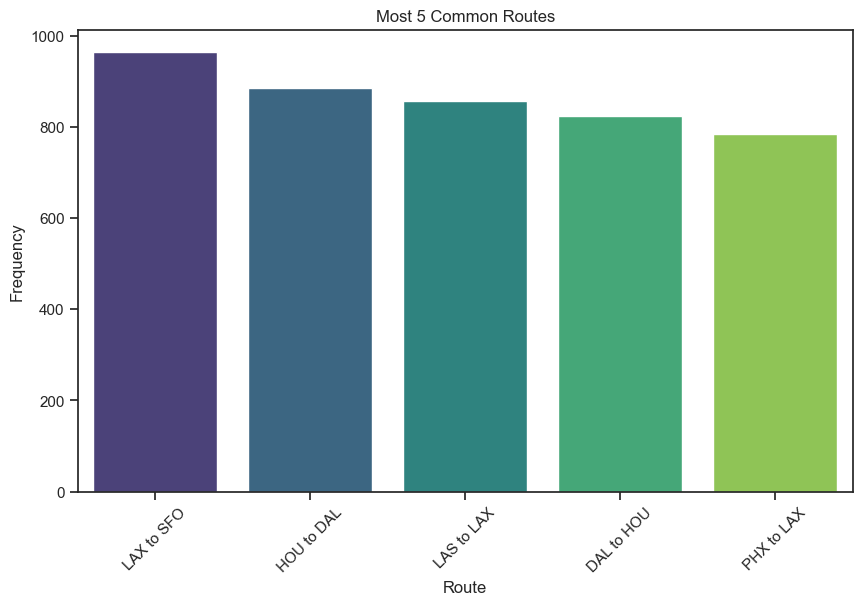

In [48]:
# Assuming common_routes is a Series with MultiIndex (origin, destination)
# Get the top 5 most common routes
top_routes = common_routes.head(5).reset_index()
top_routes.columns = ['origin', 'destination', 'count']

# Create a new column for the route
top_routes['route'] = top_routes.apply(lambda x: f"{x['origin']} to {x['destination']}", axis=1)

# Plot the count plot
plt.figure(figsize=(10, 6))
sns.barplot(x='route', y='count', data=top_routes, palette="viridis")
plt.xlabel('Route')
plt.ylabel('Frequency')
plt.title('Most 5 Common Routes')
plt.xticks(rotation=45)
plt.show()

C:\Users\Talha\AppData\Local\Temp\ipykernel_3852\1447080031.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_delays_by_route.index.map(lambda x: f"{x[0]} to {x[1]}"), y=average_delays_by_route.values,palette="viridis")


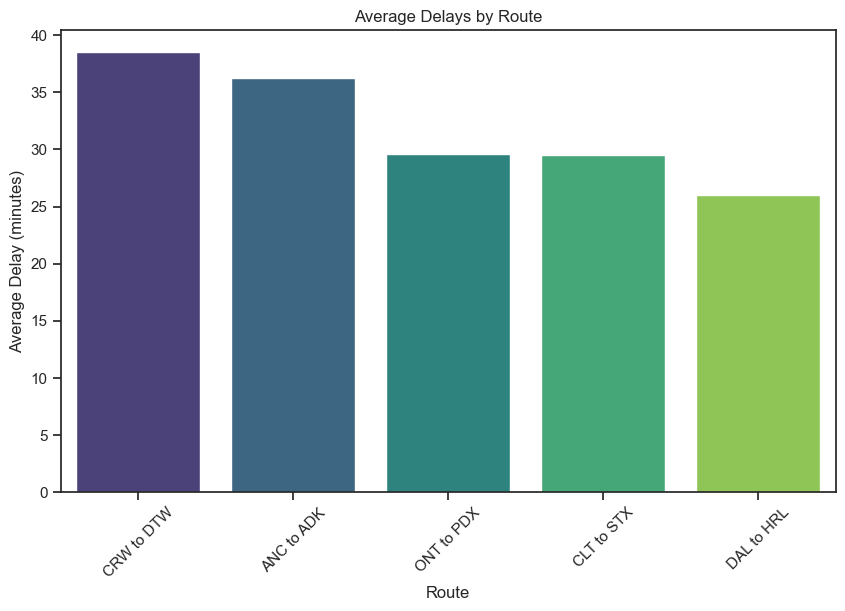

In [49]:
# Identify routes with the highest and lowest average delays
average_delays_by_route = data.groupby(['Origin', 'Dest'])['ArrDelay'].mean().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=average_delays_by_route.index.map(lambda x: f"{x[0]} to {x[1]}"), y=average_delays_by_route.values,palette="viridis")
plt.xlabel('Route')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Delays by Route')
plt.xticks(rotation=45)
plt.show()

# Cancellation Analysis

In [50]:
# Explore the reasons for flight cancellations
cancellation_reasons = data['CancellationCode'].value_counts()
print(cancellation_reasons)

CancellationCode
N    369083
Name: count, dtype: int64


In [51]:
# Calculate the percentage of canceled flights
canceled_flights_percentage = (data['Cancelled'] == 1).mean() * 100
print(f"Percentage of canceled flights: {canceled_flights_percentage:.2f}%")

Percentage of canceled flights: 0.00%


# Percentage of delays & flights

In [52]:
# Calculate the percentage of delayed flights
delayed_flights_percentage = (data['ArrDelay'] > 0).mean() * 100
print(f"Percentage of delayed flights: {delayed_flights_percentage:.2f}%")

# Calculate the percentage of each delay reason
carrier_delay_percentage = (data['CarrierDelay'] > 0).mean() * 100
weather_delay_percentage = (data['WeatherDelay'] > 0).mean() * 100
nas_delay_percentage = (data['NASDelay'] > 0).mean() * 100
security_delay_percentage = (data['SecurityDelay'] > 0).mean() * 100
late_aircraft_delay_percentage = (data['LateAircraftDelay'] > 0).mean() * 100

print(f"Percentage of carrier delays: {carrier_delay_percentage:.2f}%")
print(f"Percentage of weather delays: {weather_delay_percentage:.2f}%")
print(f"Percentage of NAS delays: {nas_delay_percentage:.2f}%")
print(f"Percentage of security delays: {security_delay_percentage:.2f}%")
print(f"Percentage of late aircraft delays: {late_aircraft_delay_percentage:.2f}%")

Percentage of delayed flights: 73.10%
Percentage of carrier delays: 98.36%
Percentage of weather delays: 0.00%
Percentage of NAS delays: 100.00%
Percentage of security delays: 0.00%
Percentage of late aircraft delays: 2.58%


# Correlation

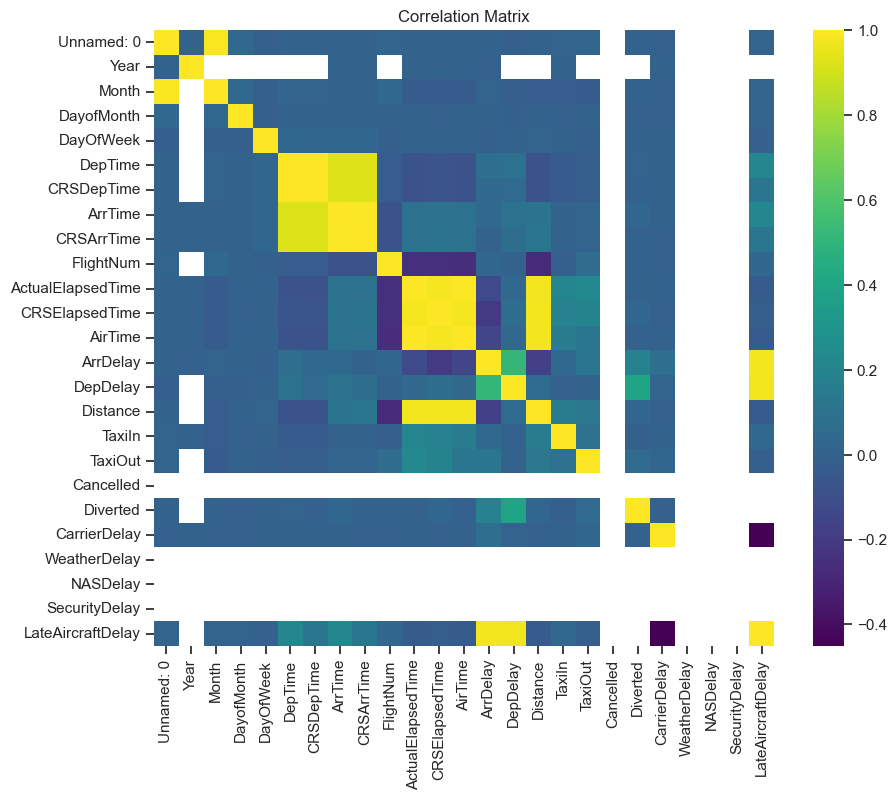

In [53]:
# Select numeric columns
numeric_data = data.select_dtypes(include=np.number)

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()


# Visualizations

Text(0, 0.5, 'Frequency')

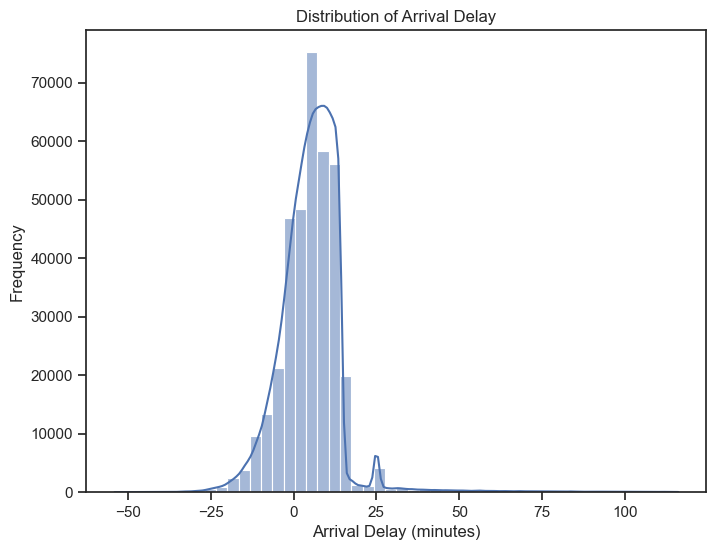

In [54]:
# Create a histogram for Arrival Delay
plt.figure(figsize=(8, 6))
sns.histplot(data['ArrDelay'], bins=50, kde=True)
plt.title('Distribution of Arrival Delay')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

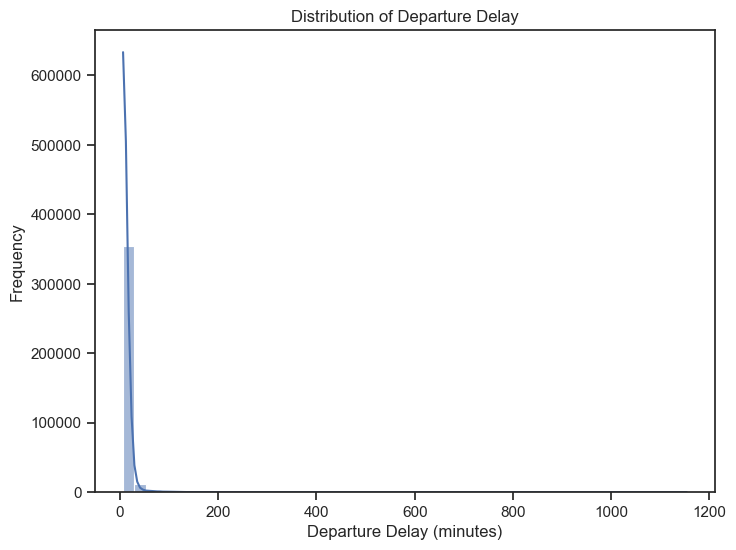

In [55]:
# Create a histogram for Departure Delay
plt.figure(figsize=(8, 6))
sns.histplot(data['DepDelay'], bins=50, kde=True)
plt.title('Distribution of Departure Delay')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Frequency')

Text(0, 0.5, 'Arrival Delay (minutes)')

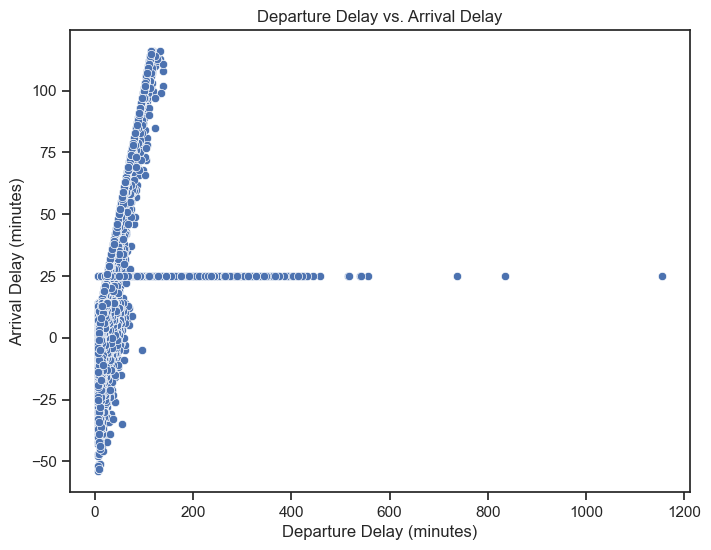

In [56]:
# Create a scatterplot to explore the relationship between Departure Delay and Arrival Delay
plt.figure(figsize=(8, 6))
sns.scatterplot(x='DepDelay', y='ArrDelay', data=data)
plt.title('Departure Delay vs. Arrival Delay')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')

Text(0, 0.5, 'Arrival Delay (minutes)')

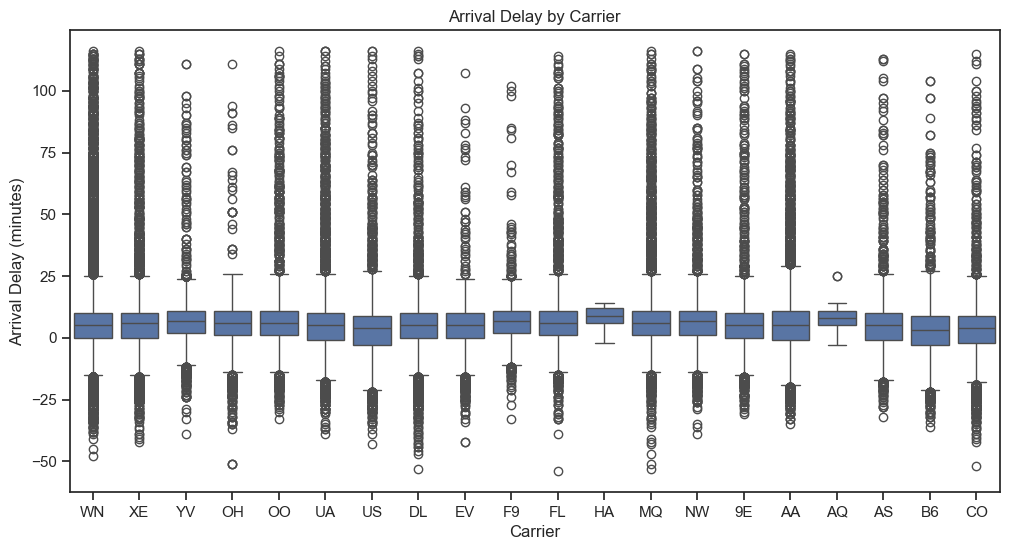

In [57]:
# Create a box plot for Arrival Delay by UniqueCarrier
plt.figure(figsize=(12, 6))
sns.boxplot(x='UniqueCarrier', y='ArrDelay', data=data)
plt.title('Arrival Delay by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Arrival Delay (minutes)')

Text(0, 0.5, 'Departure Delay (minutes)')

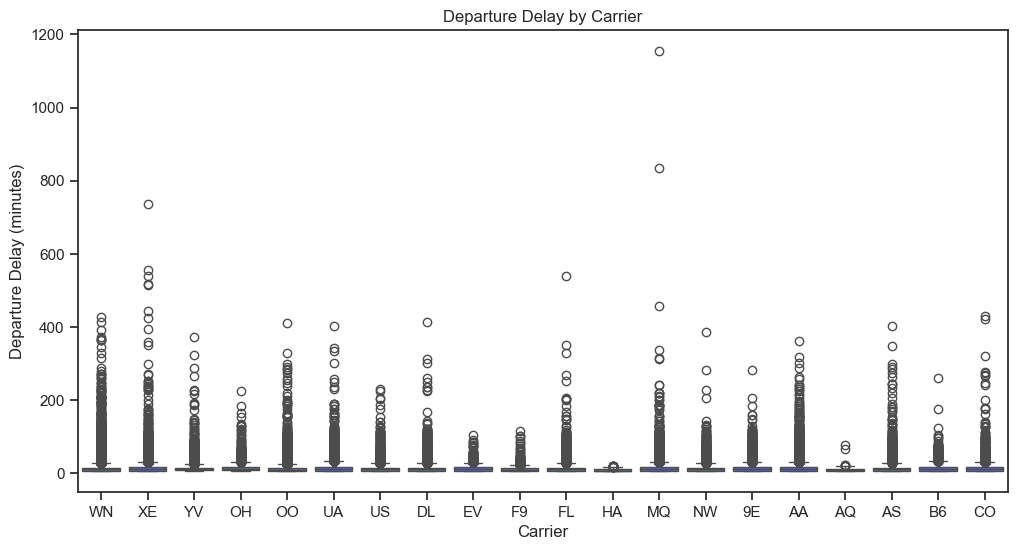

In [58]:
# Create a box plot for Departure Delay by UniqueCarrier
plt.figure(figsize=(12, 6))
sns.boxplot(x='UniqueCarrier', y='DepDelay', data=data)
plt.title('Departure Delay by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Departure Delay (minutes)')

# Key features that impact flight delays

WeatherDelay
0.0    5.154618
Name: ArrDelay, dtype: float64


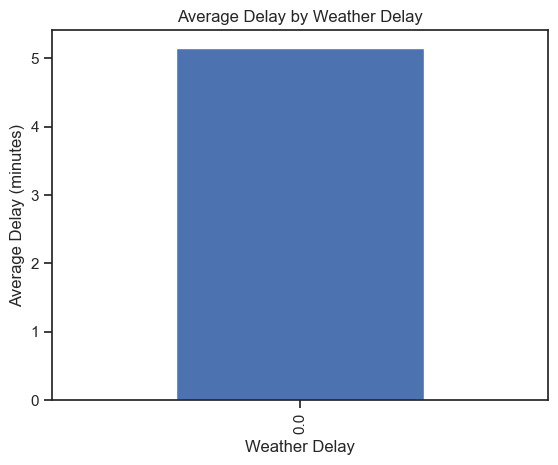

In [59]:
# Group by weather delay and calculate average delay
weather_delay = data.groupby('WeatherDelay')['ArrDelay'].mean()
print(weather_delay)

# Plot the results
import matplotlib.pyplot as plt
weather_delay.plot(kind='bar')
plt.title('Average Delay by Weather Delay')
plt.xlabel('Weather Delay')
plt.ylabel('Average Delay (minutes)')
plt.show()

SecurityDelay
0.0    5.154618
Name: ArrDelay, dtype: float64


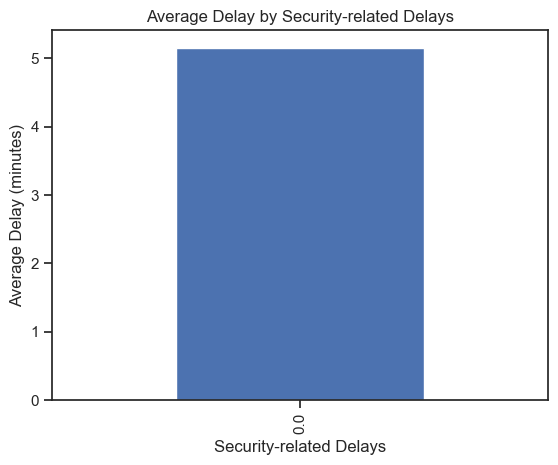

In [60]:
# Group by security delay and calculate average delay
security_delay = data.groupby('SecurityDelay')['ArrDelay'].mean()
print(security_delay)

# Plot the results
security_delay.plot(kind='bar')
plt.title('Average Delay by Security-related Delays')
plt.xlabel('Security-related Delays')
plt.ylabel('Average Delay (minutes)')
plt.show()

LateAircraftDelay
0.0       16.357280
1.0       16.181818
2.0       17.055556
3.0       17.655172
4.0       17.254902
            ...    
111.0    112.444444
112.0    113.357143
113.0    114.000000
114.0    115.000000
115.0    116.000000
Name: ArrDelay, Length: 116, dtype: float64


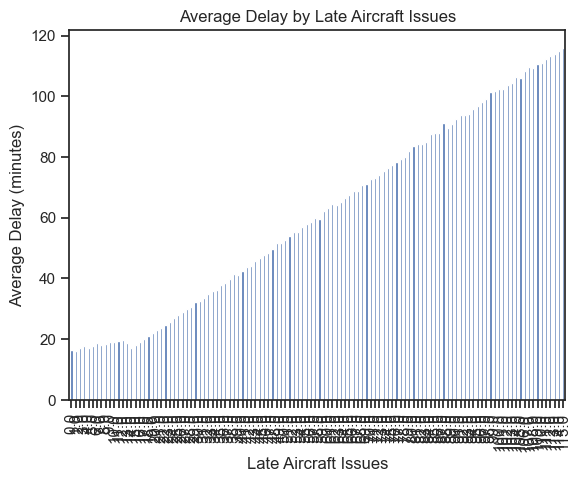

In [61]:
# Group by late aircraft delay and calculate average delay
late_aircraft_delay = data.groupby('LateAircraftDelay')['ArrDelay'].mean()
print(late_aircraft_delay)

# Plot the results
late_aircraft_delay.plot(kind='bar')
plt.title('Average Delay by Late Aircraft Issues')
plt.xlabel('Late Aircraft Issues')
plt.ylabel('Average Delay (minutes)')
plt.show()

UniqueCarrier
9E    0.0
AA    0.0
AQ    0.0
AS    0.0
B6    0.0
CO    0.0
DL    0.0
EV    0.0
F9    0.0
FL    0.0
HA    0.0
MQ    0.0
NW    0.0
OH    0.0
OO    0.0
UA    0.0
US    0.0
WN    0.0
XE    0.0
YV    0.0
Name: Cancelled, dtype: float64


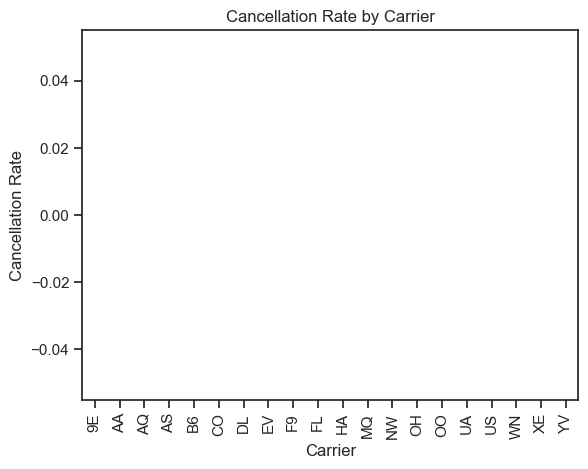

In [62]:
# Group by carrier and calculate cancellation rate
carrier_cancellations = data.groupby('UniqueCarrier')['Cancelled'].mean()
print(carrier_cancellations)

# Plot the results
carrier_cancellations.plot(kind='bar')
plt.title('Cancellation Rate by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Cancellation Rate')
plt.show()

# Label Encoding

In [63]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'CancellationCode']

for col in categorical_columns:
    data[col] = data[col].astype(str)

label_encoders = {col: LabelEncoder() for col in categorical_columns}

for col in categorical_columns:
    data[col] = label_encoders[col].fit_transform(data[col])


# Normallization

In [64]:
from sklearn.preprocessing import MinMaxScaler

numerical_columns = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'ActualElapsedTime', 
                     'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance', 
                     'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 
                     'SecurityDelay', 'LateAircraftDelay']

scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


# Model Development & Evaluation

# LinearRegression

In [65]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

columns_to_impute = [
    'ArrTime', 'CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 
    'ArrDelay', 'TaxiIn', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay'
]
imputer = SimpleImputer(strategy='median')
data[columns_to_impute] = imputer.fit_transform(data[columns_to_impute])
data.replace([np.nan, np.inf, -np.inf], 0, inplace=True)

X = data.drop('ArrDelay', axis=1)
y = data['ArrDelay']

numerical_columns = [col for col in X.columns if X[col].dtype != 'object']
X = X[numerical_columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R2 Score:', r2)


Mean Squared Error: 0.0009992768628902693
R2 Score: 0.7113301037695232


# DecisionTreeRegressor

In [66]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

columns_to_impute = [
    'ArrTime', 'CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 
    'ArrDelay', 'TaxiIn', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay'
]
imputer = SimpleImputer(strategy='median')
data[columns_to_impute] = imputer.fit_transform(data[columns_to_impute])

data.replace([np.nan, np.inf, -np.inf], 0, inplace=True)

X = data.drop('ArrDelay', axis=1)
y = data['ArrDelay']

numerical_columns = [col for col in X.columns if X[col].dtype != 'object']
X = X[numerical_columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R2 Score:', r2)


Mean Squared Error: 4.616813308024946e-05
R2 Score: 0.9866630053387978


# RandomForestRegressor

In [67]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

columns_to_impute = [
    'ArrTime', 'CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 
    'ArrDelay', 'TaxiIn', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay'
]
imputer = SimpleImputer(strategy='median')
data[columns_to_impute] = imputer.fit_transform(data[columns_to_impute])

data.replace([np.nan, np.inf, -np.inf], 0, inplace=True)

X = data.drop('ArrDelay', axis=1)
y = data['ArrDelay']

numerical_columns = [col for col in X.columns if X[col].dtype != 'object']
X = X[numerical_columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

y_pred = forest_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R2 Score:', r2)


Mean Squared Error: 1.1897420268668853e-05
R2 Score: 0.9965630875667096


# GradientBoostingRegressor

In [68]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

columns_to_impute = [
    'ArrTime', 'CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 
    'ArrDelay', 'TaxiIn', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay'
]
imputer = SimpleImputer(strategy='median')
data[columns_to_impute] = imputer.fit_transform(data[columns_to_impute])

data.replace([np.nan, np.inf, -np.inf], 0, inplace=True)

X = data.drop('ArrDelay', axis=1)
y = data['ArrDelay']
numerical_columns = [col for col in X.columns if X[col].dtype != 'object']
X = X[numerical_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R2 Score:', r2)


Mean Squared Error: 0.000769505783740288
R2 Score: 0.7777060962878982


# Compare the performance

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression()
tree_model = DecisionTreeRegressor(random_state=42)
forest_model = RandomForestRegressor(random_state=42)
gbm_model = GradientBoostingRegressor(random_state=42)

# List of models for iteration
models = [linear_model, tree_model, forest_model, gbm_model]
model_names = ['Linear Regression', 'Decision Trees', 'Random Forests', 'Gradient Boosting Machines']

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R² Score: {r2}")
    print()

# Compare performances based on MSE and R² Score
# Select the model with the lowest MSE and highest R² Score for deployment


Model: Linear Regression
Mean Squared Error: 0.0009992768628902693
R² Score: 0.7113301037695232

Model: Decision Trees
Mean Squared Error: 4.616813308024946e-05
R² Score: 0.9866630053387978

Model: Random Forests
Mean Squared Error: 1.1897420268668853e-05
R² Score: 0.9965630875667096

Model: Gradient Boosting Machines
Mean Squared Error: 0.000769505783740288
R² Score: 0.7777060962878982



# Visually: Compare the performance

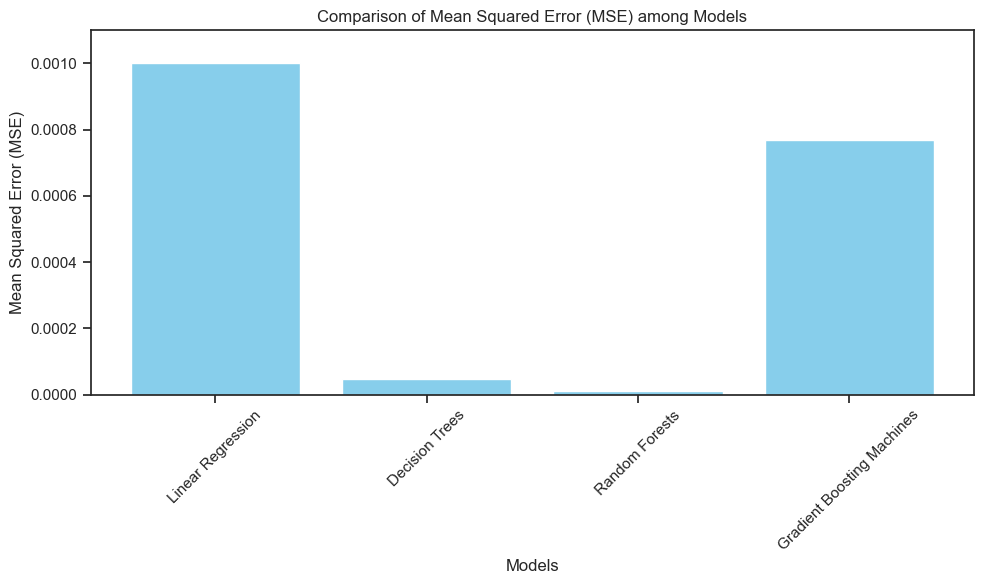

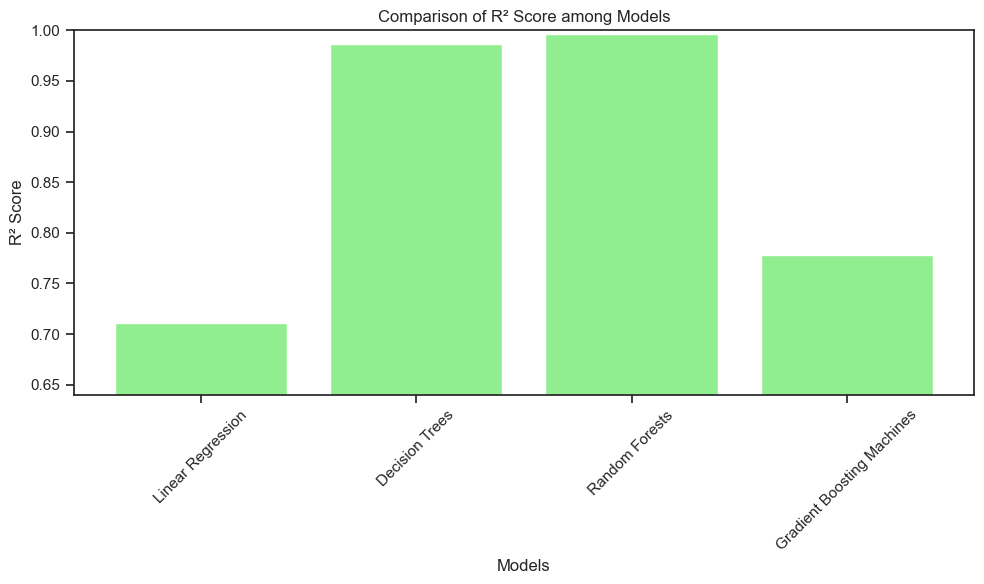

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
linear_model = LinearRegression()
tree_model = DecisionTreeRegressor(random_state=42)
forest_model = RandomForestRegressor(random_state=42)
gbm_model = GradientBoostingRegressor(random_state=42)

# List of models for iteration
models = [linear_model, tree_model, forest_model, gbm_model]
model_names = ['Linear Regression', 'Decision Trees', 'Random Forests', 'Gradient Boosting Machines']

# Train and evaluate each model
mse_scores = []
r2_scores = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_scores.append(mse)
    r2_scores.append(r2)

# Plotting MSE
plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE) among Models')
plt.ylim(0, max(mse_scores) * 1.1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting R2 Score
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_scores, color='lightgreen')
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.title('Comparison of R² Score among Models')
plt.ylim(min(r2_scores) * 0.9, 1.0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [73]:
import pickle

# Assuming 'forest_model' is your trained model
filename = 'model1.pkl'
pickle.dump(forest_model, open(filename, 'wb'))


In [74]:
import pickle

# Assuming 'forest_model' is your trained model
filename = 'model_implement.pkl'
pickle.dump(forest_model, open(filename, 'wb'))


In [75]:
joblib.dump(model, 'model_implement')


['model_implement']

In [76]:
from sklearn import __version__ as sklearn_version
print(f"scikit-learn version used for model: {sklearn_version}")

scikit-learn version used for model: 1.5.1
